In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/MSCI-623/UCI_Credit_Card.csv", index_col=False)
# /content/drive/MyDrive/MSCI-623/UCI_Credit_Card.csv

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
# Exploratory Data Analysis

**Brief Overview of the dataset**

The dataset for default of credit card clients in Taiwan [1] contains 30,000 instances spread across 25 attributes (24 predictor variables and 1 outcome variable).

The description of each attribute in the dataset is provided below:-

1.) ID: ID of each client

2.) LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

3.) SEX: Gender (1=male, 2=female)

4.) EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

5.) MARRIAGE: Marital status (1=married, 2=single, 3=others)

6.) AGE: Age in years

7.) PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

8.) PAY_2: Repayment status in August, 2005 (scale same as above)

9.) PAY_3: Repayment status in July, 2005 (scale same as above)

10.) PAY_4: Repayment status in June, 2005 (scale same as above)

11.) PAY_5: Repayment status in May, 2005 (scale same as above)

12.) PAY_6: Repayment status in April, 2005 (scale same as above)

13.) BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

14.) BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

15.) BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

16.) BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

17.) BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

18.) BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

19.) PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

20.) PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

21.) PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

22.) PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

23.) PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

24.) PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

25.) default.payment.next.month: Default payment (1=yes, 0=no)



In [ ]:
# remove the first row containing column names
# df = df.drop(labels=0, axis=0)

In [ ]:
df.shape # checking count of data

(30000, 25)

As per our dataset, the number of rows and columns are as follows:-

Number of rows: 30000 </br>
Number of columns: 25

In [ ]:
# rename outcome variable in an acceptable format to minimize any issues that might arise afterwards
df.rename(columns={"default.payment.next.month": "def_pay", "PAY_0": "PAY_1"}, inplace=True)

In [ ]:
print(df)

          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  \
0          1    20000.0    2          2         1   24      2      2     -1   
1          2   120000.0    2          2         2   26     -1      2      0   
2          3    90000.0    2          2         2   34      0      0      0   
3          4    50000.0    2          2         1   37      0      0      0   
4          5    50000.0    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996   220000.0    1          3         1   39      0      0      0   
29996  29997   150000.0    1          3         2   43     -1     -1     -1   
29997  29998    30000.0    1          2         2   37      4      3      2   
29998  29999    80000.0    1          3         1   41      1     -1      0   
29999  30000    50000.0    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

In [ ]:
total_missing_values = df.isnull().sum().sort_values(ascending=False)
total_missing_values

ID           0
BILL_AMT2    0
PAY_AMT6     0
PAY_AMT5     0
PAY_AMT4     0
PAY_AMT3     0
PAY_AMT2     0
PAY_AMT1     0
BILL_AMT6    0
BILL_AMT5    0
BILL_AMT4    0
BILL_AMT3    0
BILL_AMT1    0
LIMIT_BAL    0
PAY_6        0
PAY_5        0
PAY_4        0
PAY_3        0
PAY_2        0
PAY_1        0
AGE          0
MARRIAGE     0
EDUCATION    0
SEX          0
def_pay      0
dtype: int64

As we can see above there are no null values present among all the attributes in our dataset.

In [ ]:
missing_values = total_missing_values[total_missing_values.values !=0]
missing_values # this indicates there is no missing values

Series([], dtype: int64)

In [ ]:
df.dtypes

ID             int64
LIMIT_BAL    float64
SEX            int64
EDUCATION      int64
MARRIAGE       int64
AGE            int64
PAY_1          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
def_pay        int64
dtype: object

As all our attributes are of int or float data-type thus no need to make any modifications..

In [ ]:
# fetching the column names with data type='object' and storing those in a variable
object_columns=df.select_dtypes(include='object').columns
object_columns

Index([], dtype='object')

In [ ]:
for i in object_columns:
  # unique values in each column
  print(f'Count of Unique values in {i}:{df[i].nunique()}')
  print('********************************')
  print(f'Count of  values in {i}:{df[i].count()}')
  print('********************************')

In [ ]:
df.describe() # to check the distribution of the data
# df.describe().iloc[:, 20:] -> selecting last 5 columns, selecting below button to convert to an interactive dataframe and then
# extracting it to an excel

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


**Summary statistics of our dataset**

| Attribute                  | Min      | Max     | Mean          | Std Deviation |
| -------------------------- | -------- | ------- | ------------- | ------------- |
| ID                         | 1        | 30000   | 15000.5       | 8660.398374   |
| LIMIT_BAL                  | 10000    | 1000000 | 167484.3227   | 129747.6616   |
| SEX                        | 1        | 2       | 1.603733333   | 0.489129196   |
| EDUCATION                  | 0        | 6       | 1.853133333   | 0.79034866    |
| MARRIAGE                   | 0        | 3       | 1.551866667   | 0.521969601   |
| AGE                        | 21       | 79      | 35.4855       | 9.217904068   |
| PAY_0                      | \-2      | 8       | \-0.0167      | 1.123801528   |
| PAY_2                      | \-2      | 8       | \-0.133766667 | 1.197185973   |
| PAY_3                      | \-2      | 8       | \-0.1662      | 1.196867568   |
| PAY_4                      | \-2      | 8       | \-0.220666667 | 1.169138622   |
| PAY_5                      | \-2      | 8       | \-0.2662      | 1.133187406   |
| PAY_6                      | \-2      | 8       | \-0.2911      | 1.149987626   |
| BILL_AMT1                  | \-165580 | 964511  | 51223.3309    | 73635.86058   |
| BILL_AMT2                  | \-69777  | 983931  | 49179.07517   | 71173.76878   |
| BILL_AMT3                  | \-157264 | 1664089 | 47013.1548    | 69349.38743   |
| BILL_AMT4                  | \-170000 | 891586  | 43262.94897   | 64332.85613   |
| BILL_AMT5                  | \-81334  | 927171  | 40311.40097   | 60797.15577   |
| BILL_AMT6                  | \-339603 | 961664  | 38871.7604    | 59554.10754   |
| PAY_AMT1                   | 0        | 873552  | 5663.5805     | 16563.28035   |
| PAY_AMT2                   | 0        | 1684259 | 5921.1635     | 23040.8704    |
| PAY_AMT3                   | 0        | 896040  | 5225.6815     | 17606.96147   |
| PAY_AMT4                   | 0        | 621000  | 4826.076867   | 15666.15974   |
| PAY_AMT5                   | 0        | 426529  | 4799.387633   | 15278.30568   |
| PAY_AMT6                   | 0        | 528666  | 5215.502567   | 17777.46578   |
| default_payment_next_month | 0        | 1       | 0.2212        | 0.415061806   |

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_1      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

In [ ]:
# to check any presence of NA values
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
def_pay      0
dtype: int64

In [ ]:
df.SEX.value_counts() # checking count of values for each category in 'type' column; similar to groupby clause

2    18112
1    11888
Name: SEX, dtype: int64

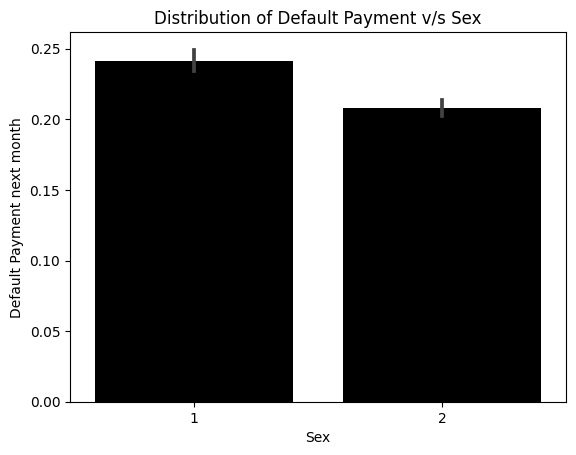

In [ ]:
sns.barplot(x='SEX',y='def_pay',data=df, color="black")
plt.xlabel('Sex')
plt.ylabel('Default Payment next month')
plt.title('Distribution of Default Payment v/s Sex')
plt.show()

In [ ]:
df.def_pay.value_counts()

0    23364
1     6636
Name: def_pay, dtype: int64

In [ ]:
# Plotting distribution of Age feature
"""plt.figure(figsize=(10,8), )
plt.title('Age Distribution (Seconds)')
sns.histplot(df['X5'], color='blue')"""

"plt.figure(figsize=(10,8), )\nplt.title('Age Distribution (Seconds)')\nsns.histplot(df['X5'], color='blue')"

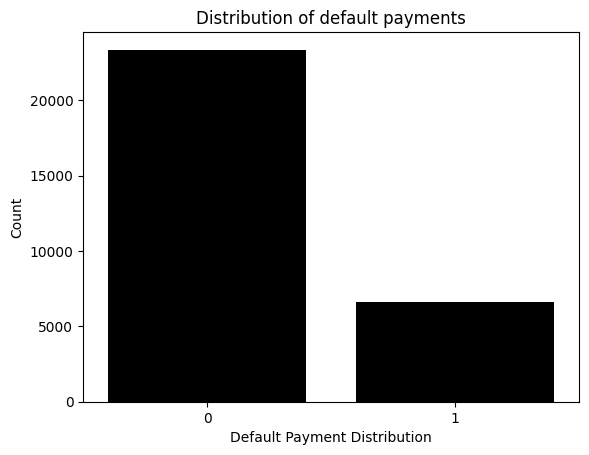

In [ ]:
sns.countplot(x='def_pay',data=df, color="black")
plt.xlabel('Default Payment Distribution')
plt.ylabel('Count')
plt.title('Distribution of default payments')
plt.show()
# this indicates that the data is highly unbalanced

In [ ]:
# df.isFlaggedFraud.value_counts()

In [ ]:
"""sns.countplot(x='isFlaggedFraud',data=df)
plt.xlabel('Fraud Distribution')
plt.ylabel('Count')
plt.title('Distribution of isFlaggedFraud flag')
plt.show()"""

"sns.countplot(x='isFlaggedFraud',data=df)\nplt.xlabel('Fraud Distribution')\nplt.ylabel('Count')\nplt.title('Distribution of isFlaggedFraud flag')\nplt.show()"

In [ ]:
# Generic utility function built for generating boxplots & histograms as per input df and column
def variable_distribution(dataframe, col):
    fig, ax = plt.subplots(1, 2, figsize=(20,8))

    sns.boxplot(data=dataframe, x=col, ax=ax[0], palette="pastel")
    ax[0].set_title(f'{col.title()} Boxplot')

    sns.histplot(data=dataframe, x=col, ax=ax[1], color="black", kde=True)
    ax[1].set_title(f'{col.title()} Histogram')

    fig.suptitle(f'{col.title()} Distribution'.replace('_', ' '), fontsize=15, color='brown')

In [ ]:
# converting datatypes from object to numeric
#df = df.apply(pd.to_numeric)
df = df.astype(int)

In [ ]:
from pandas.core.computation.ops import isnumeric
# df.head()
#isnumeric(df.Y)
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default_payment_next_month    int64
dtype: object

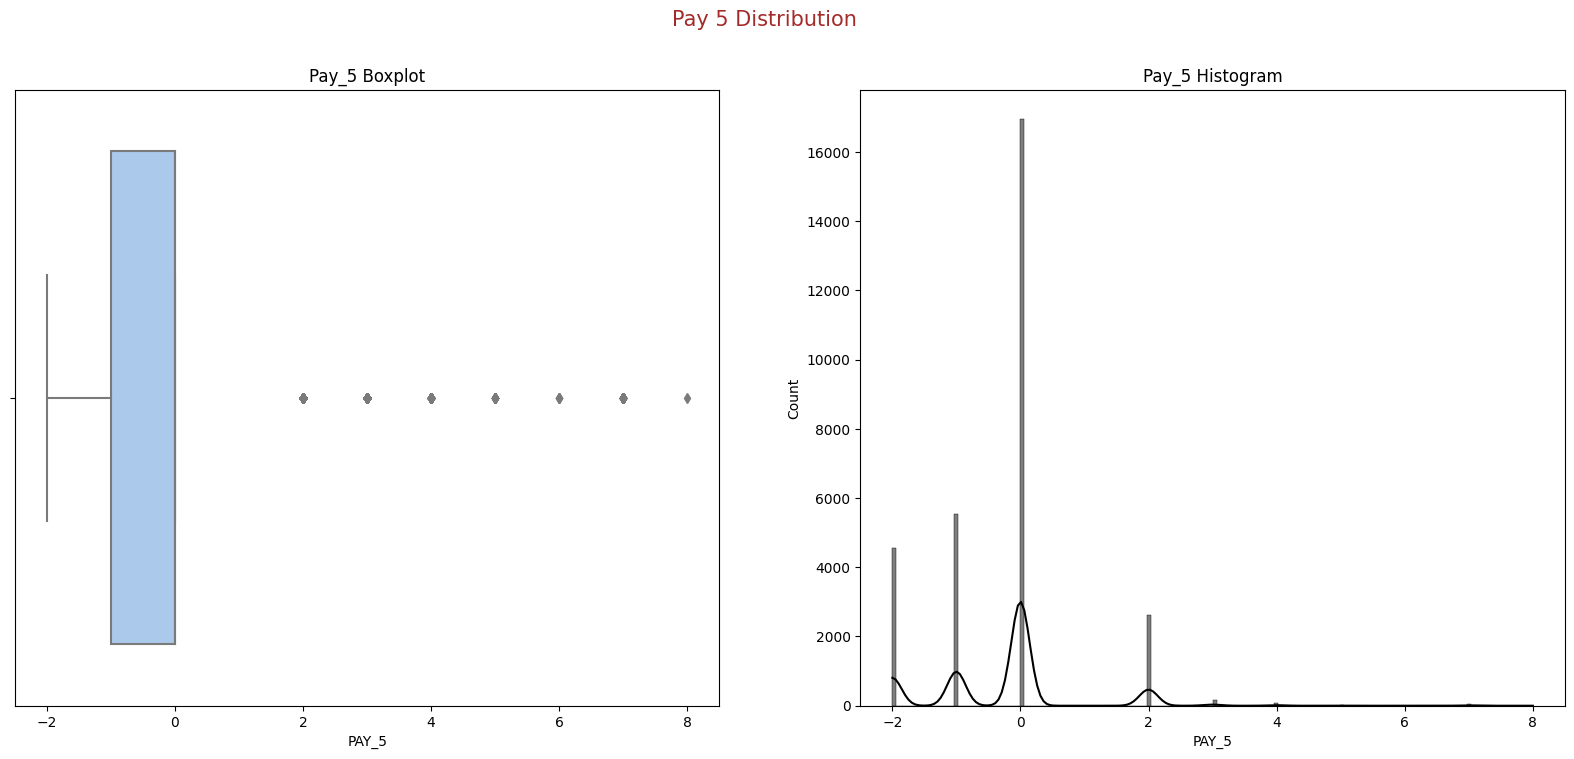

In [ ]:
# to check distribution of amount
variable_distribution(df,'PAY_5')

In [ ]:
# Generic utility function built for generating Q-Q plot & Normal distribution curve as per input data
def qq_plot(data):
    # Generate a sorted array of data points
    sorted_data = np.sort(data)

    # Generate quantiles for the data
    quantiles = np.arange(0.01, 1, 0.01)
    quantile_values = np.quantile(sorted_data, quantiles)

    # Generate quantiles for the normal distribution
    expected_quantiles = stats.norm.ppf(quantiles)

    # Plot QQ plot and normal distribution curve side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # QQ plot
    ax1.scatter(expected_quantiles, quantile_values)
    ax1.plot([np.min(expected_quantiles), np.max(expected_quantiles)],
             [np.min(quantile_values), np.max(quantile_values)],
             color='r', linestyle='--')
    ax1.set_xlabel('Expected Quantiles')
    ax1.set_ylabel('Sample Quantiles')
    ax1.set_title('QQ Plot')

    # Normal distribution curve
    ax2.hist(data, density=True, bins=30, alpha=0.5)
    xmin, xmax = ax2.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    ax2.plot(x, stats.norm.pdf(x, np.mean(data), np.std(data)), color='r')
    ax2.set_xlabel('Data')
    ax2.set_ylabel('Density')
    ax2.set_title('Normal Distribution Curve')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

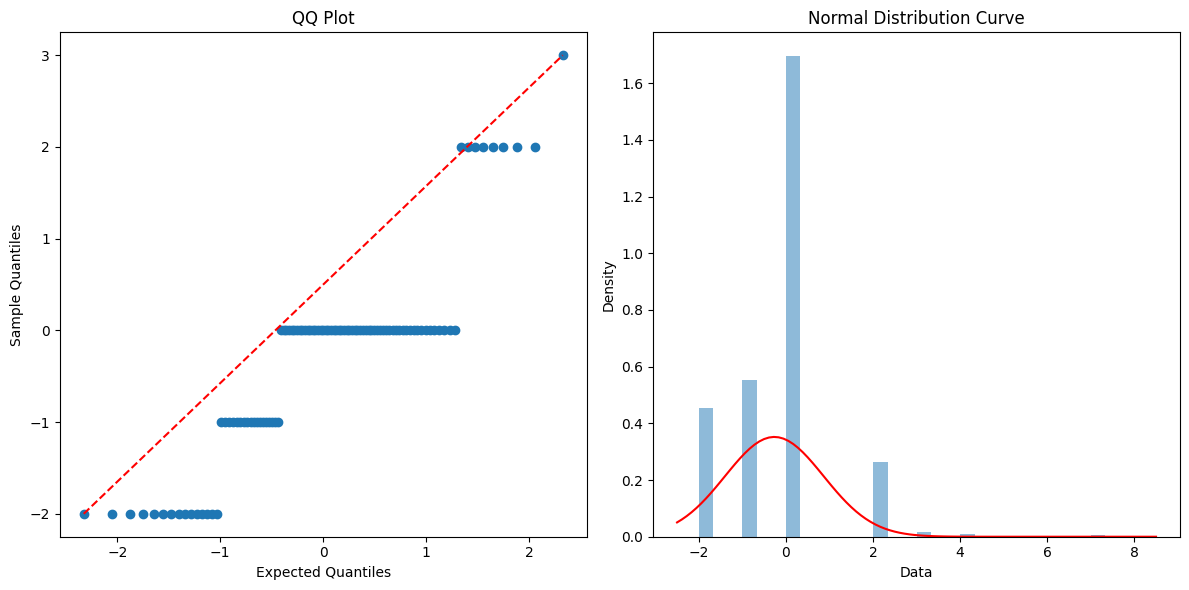

In [ ]:
qq_plot(df['PAY_5'])

In [ ]:
#checking box plot and Histogram of all the variables, excluding variables with 'object' datatype
column_list=df.select_dtypes(exclude='object').columns
column_list

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')

<ipython-input-26-9c67adcfda3c>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 2, figsize=(20,8))


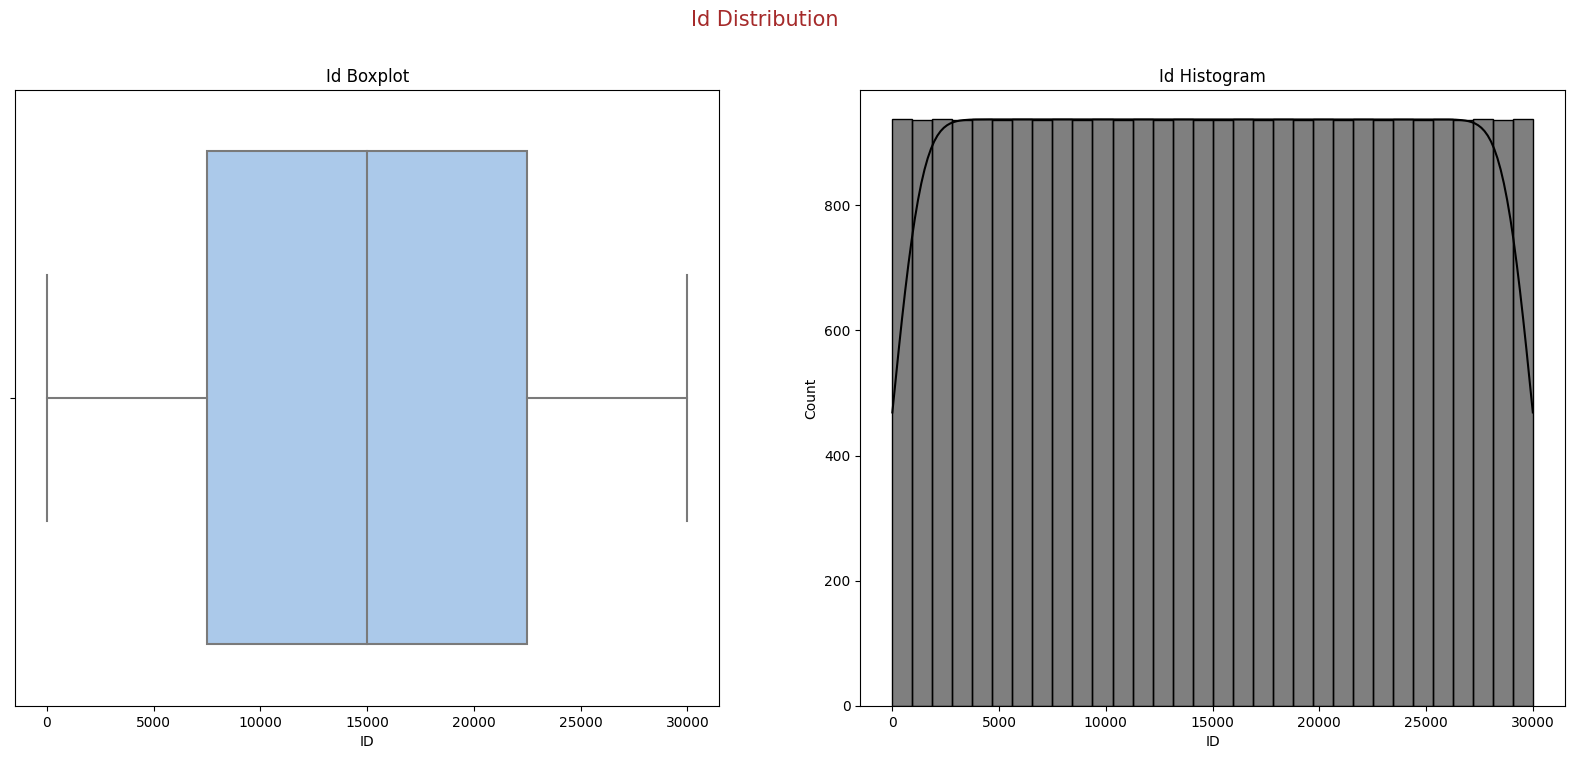

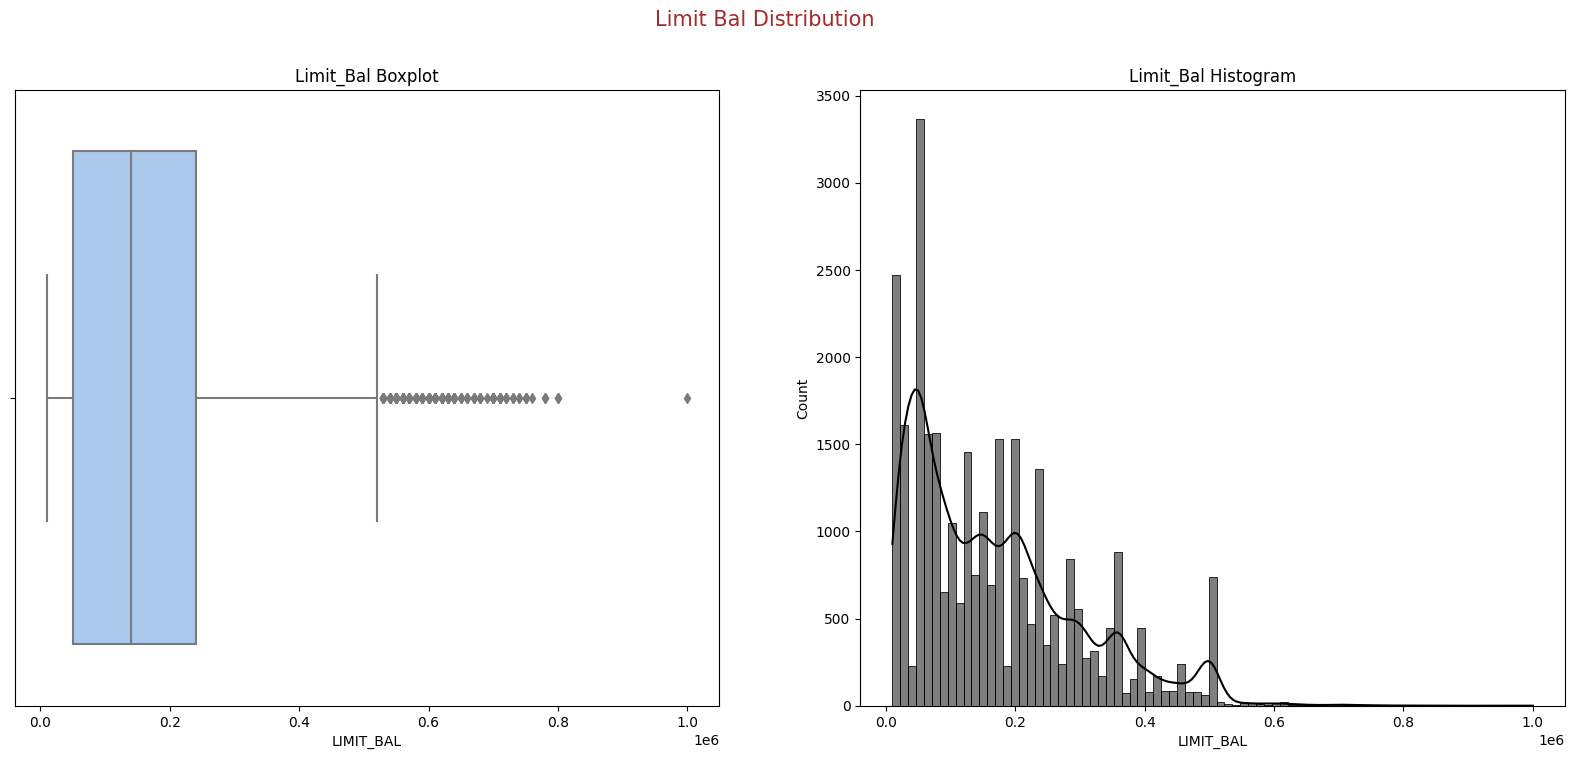

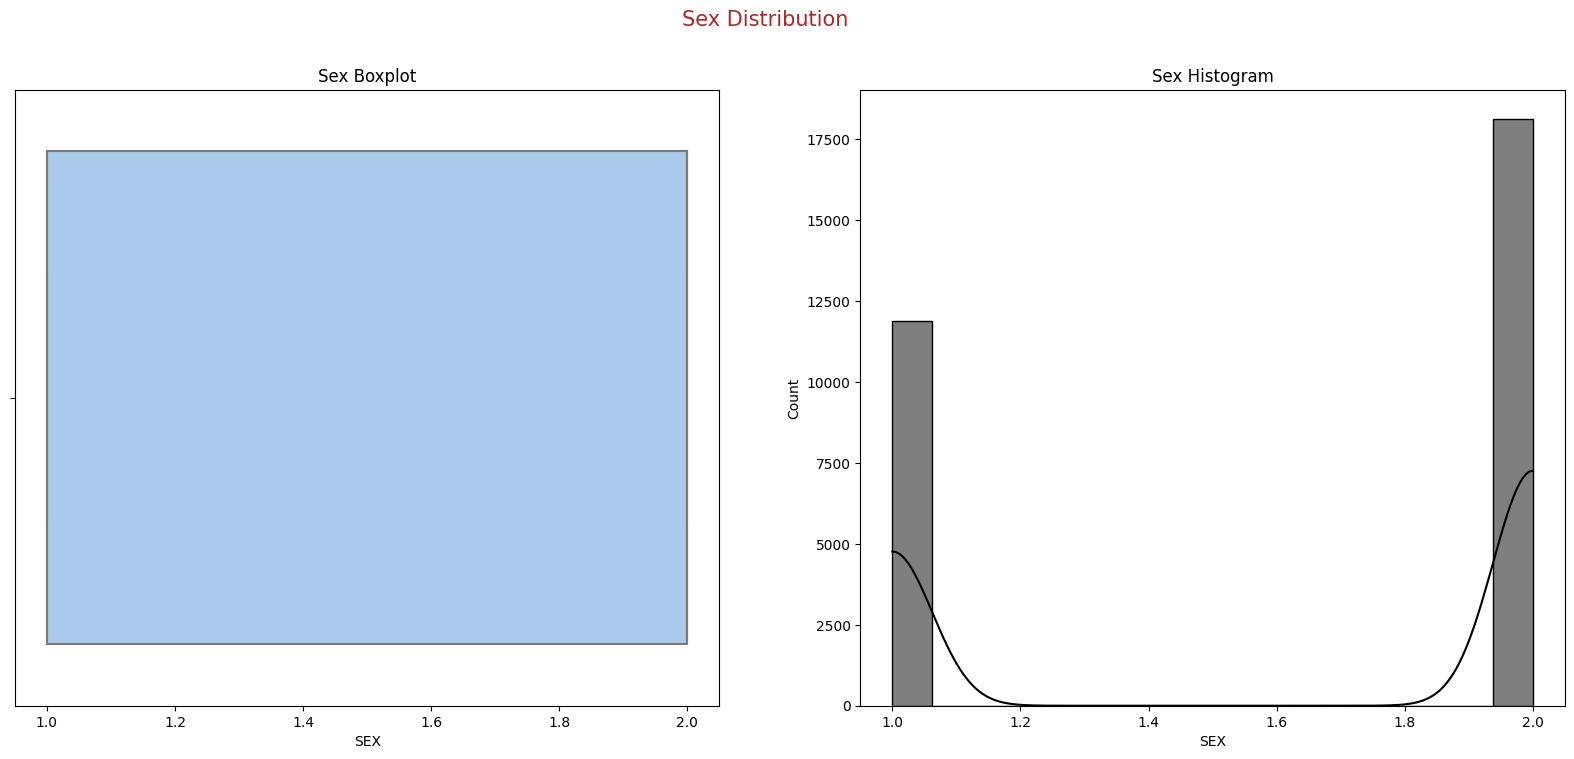

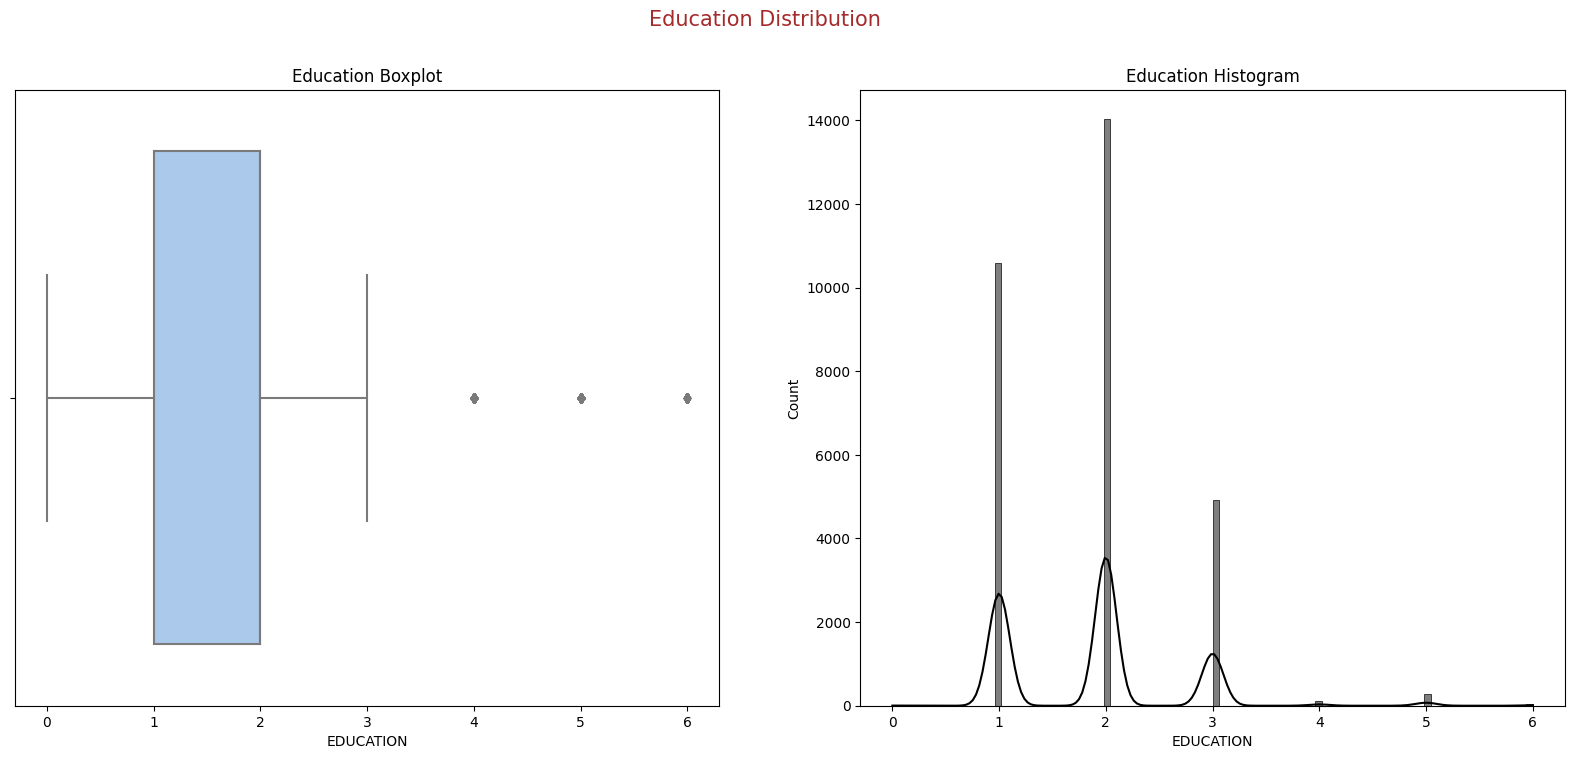

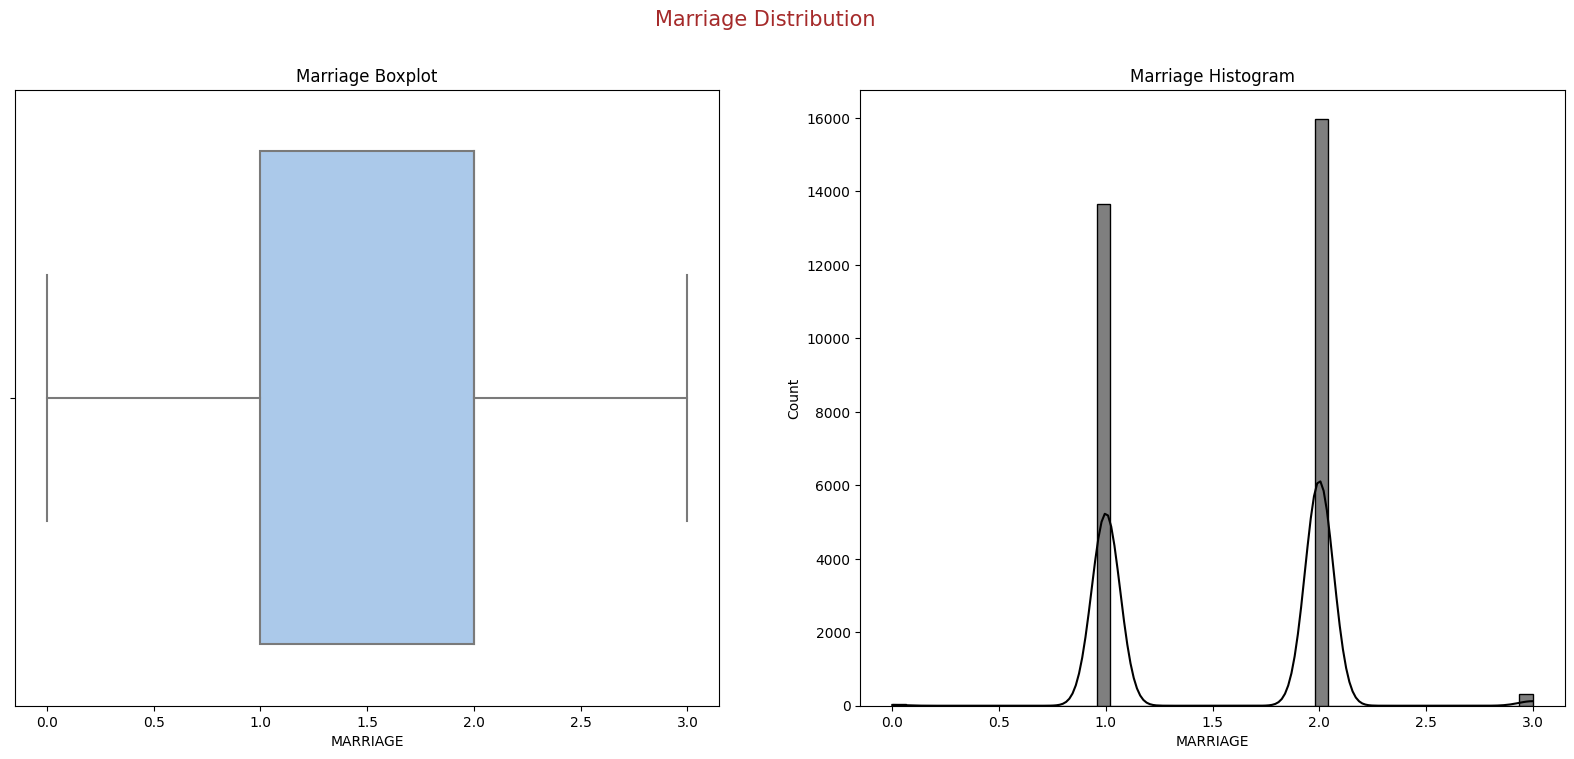

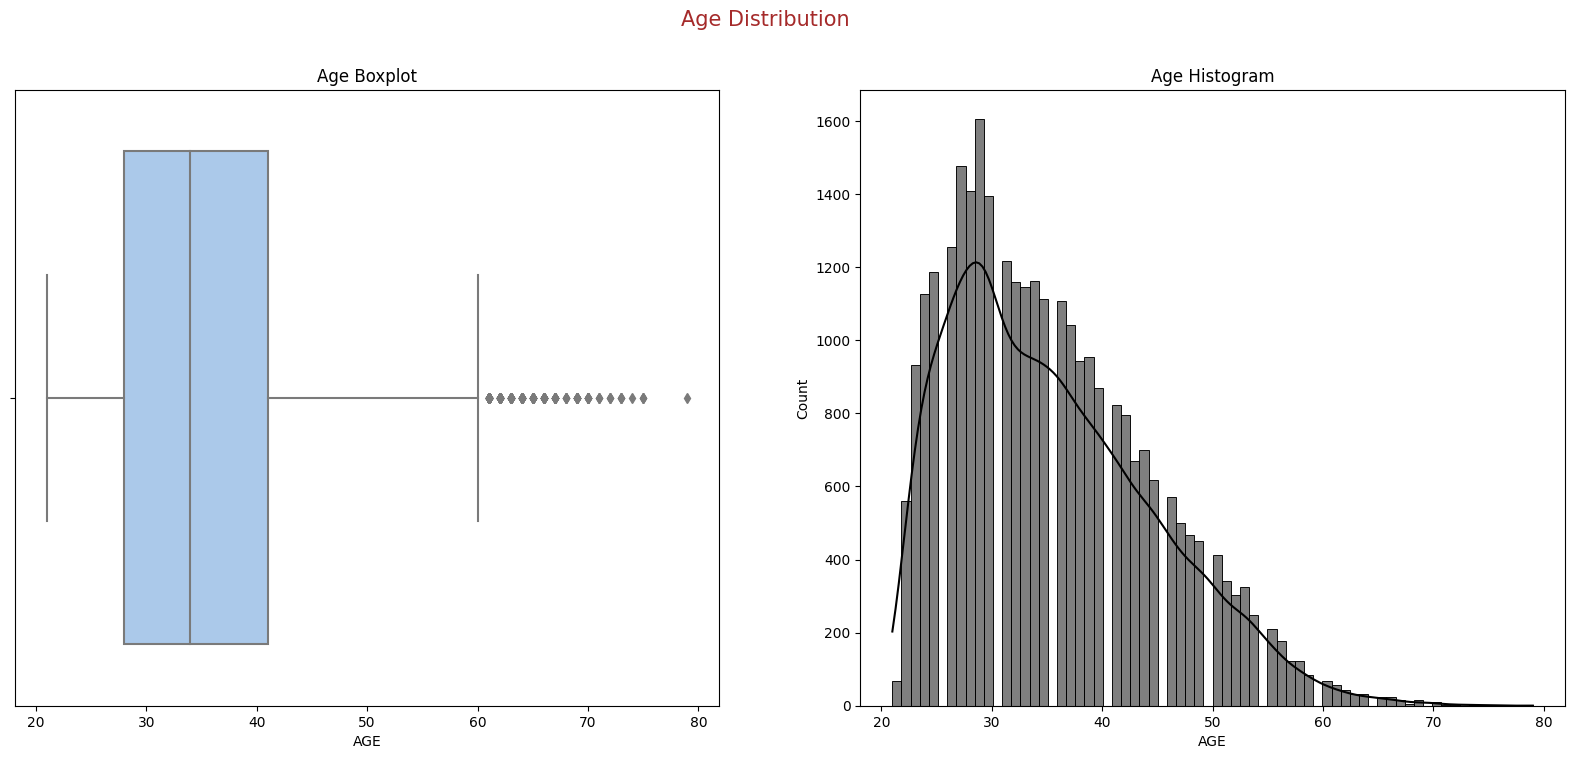

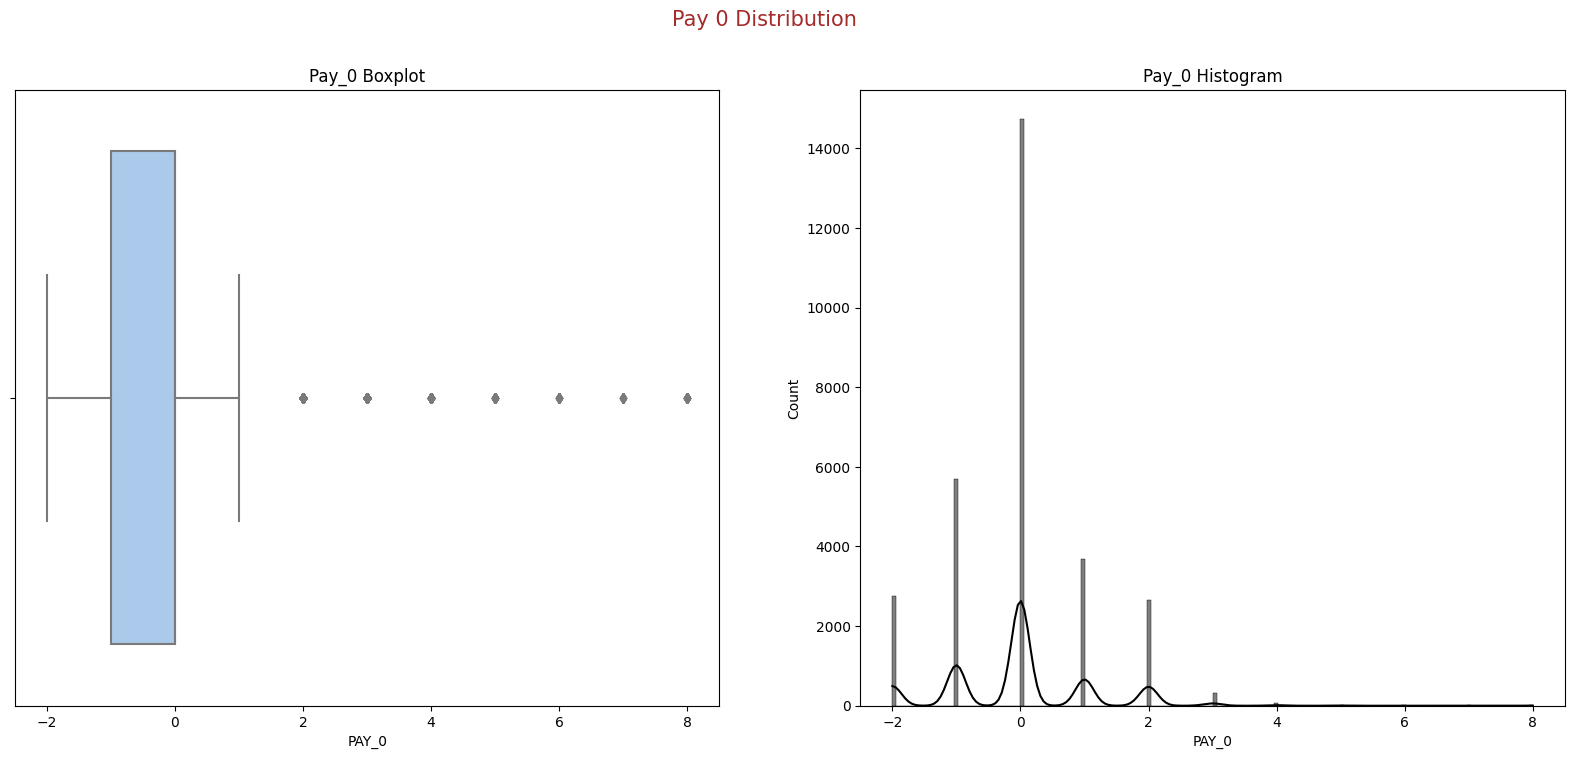

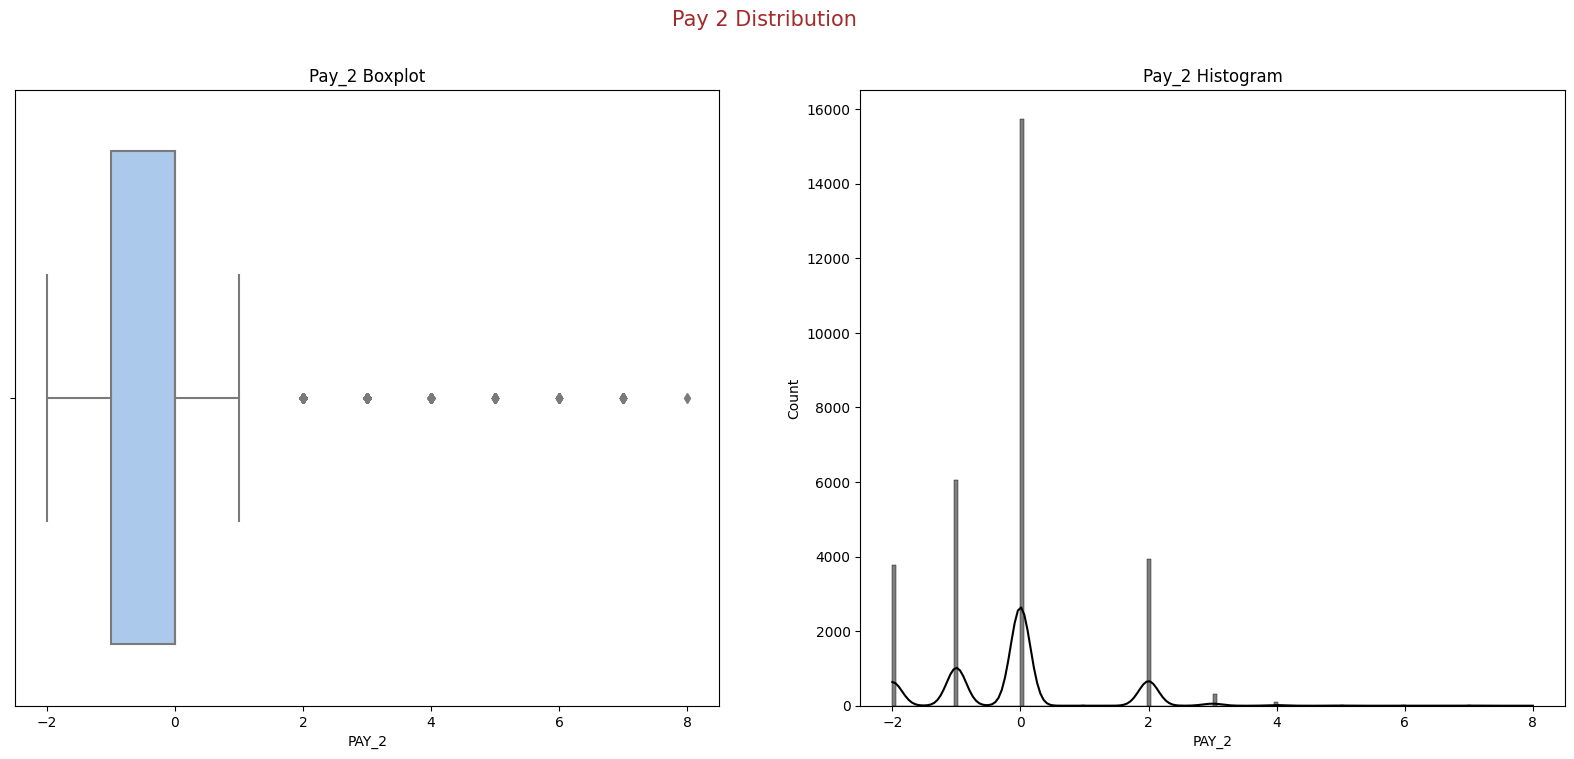

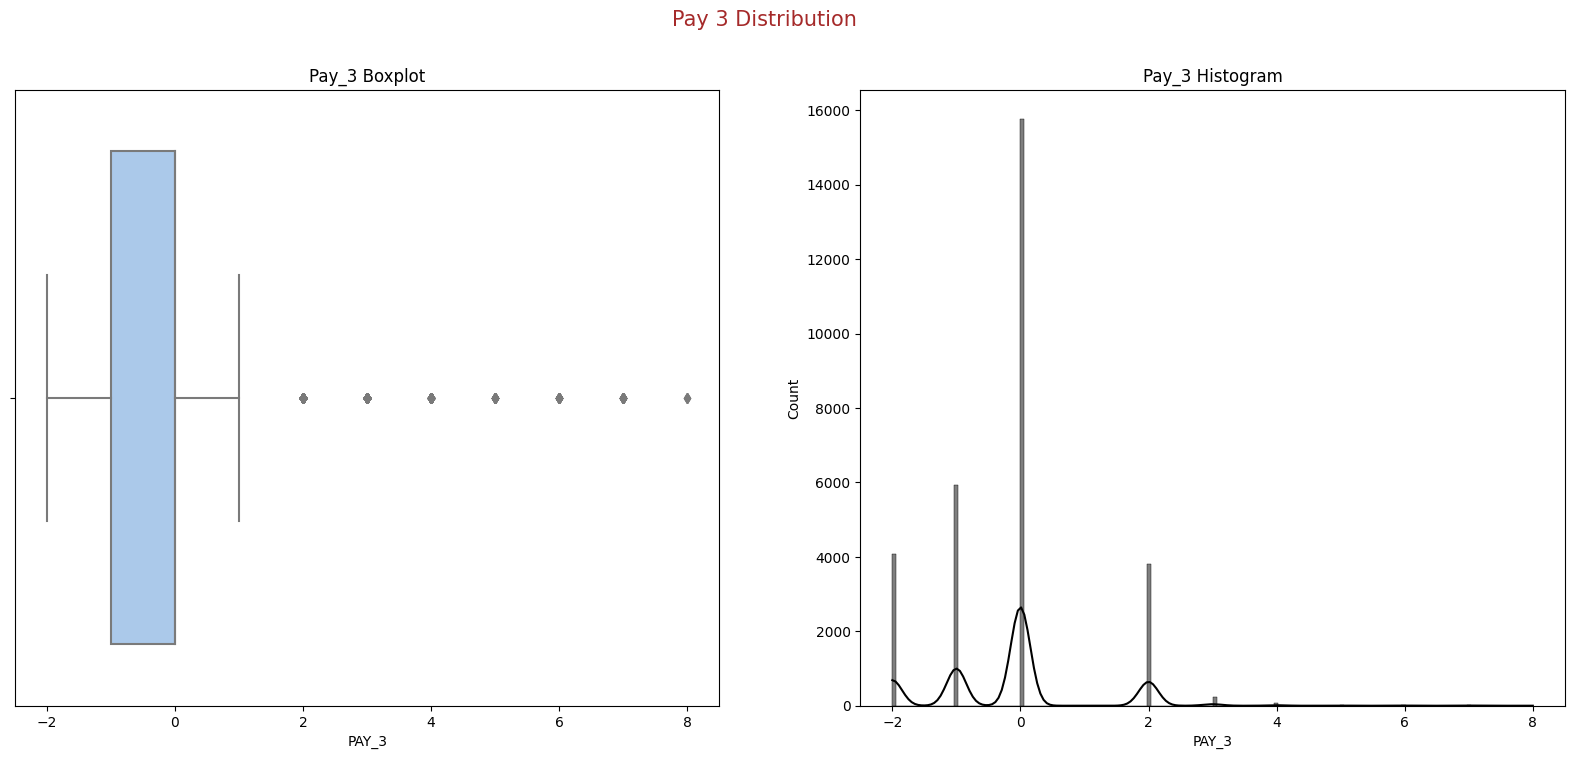

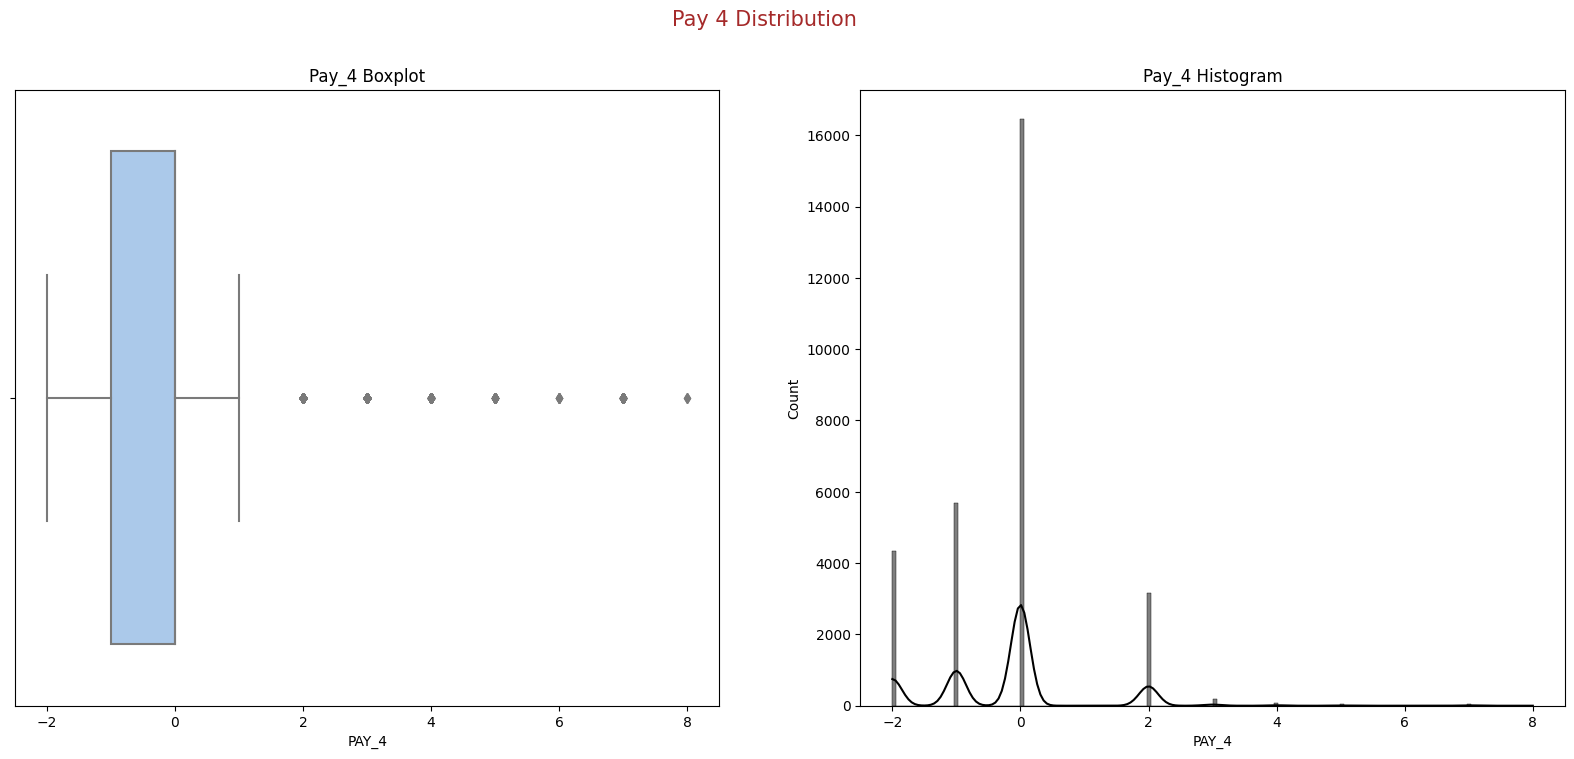

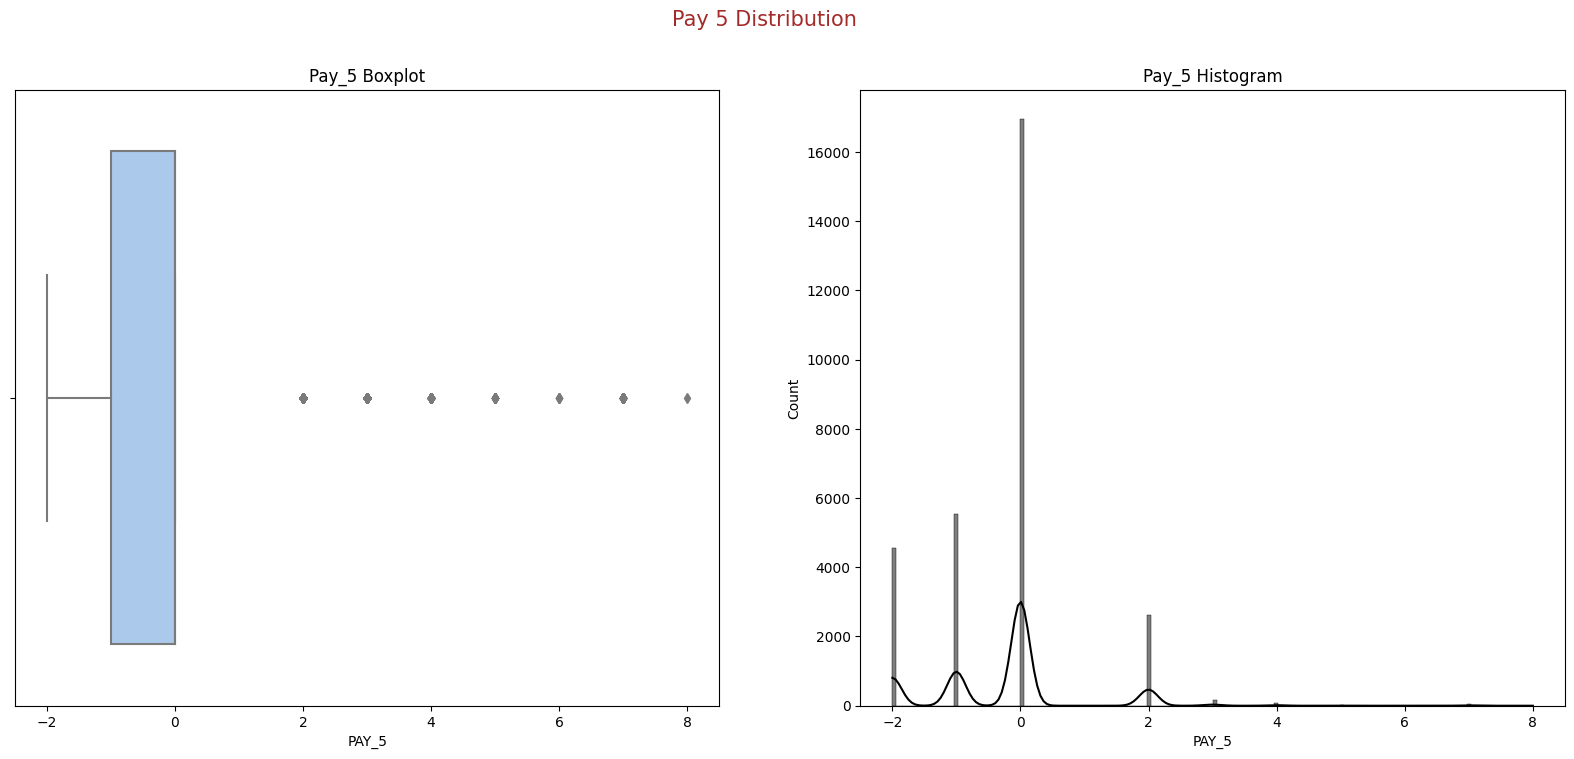

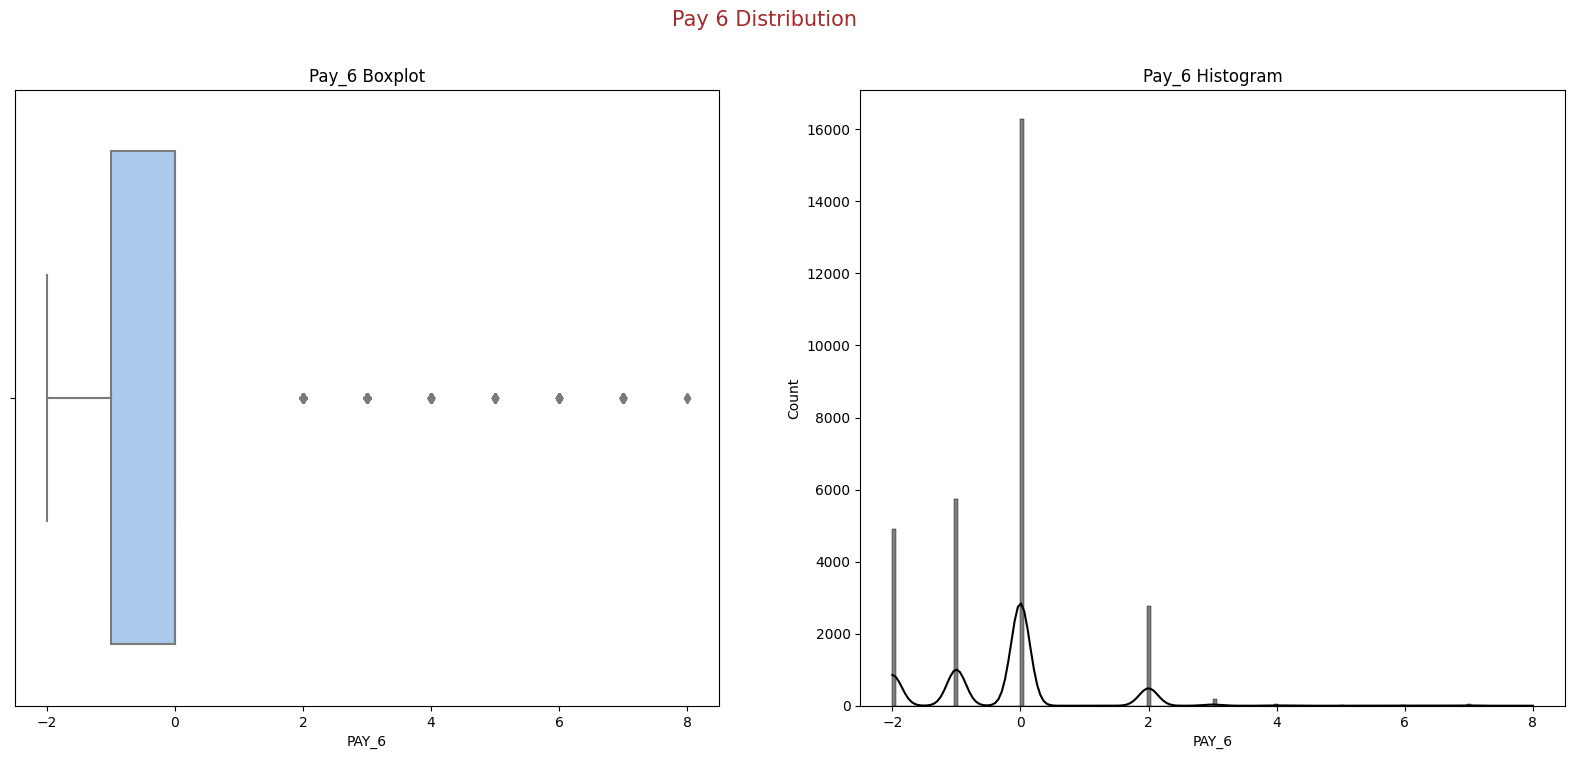

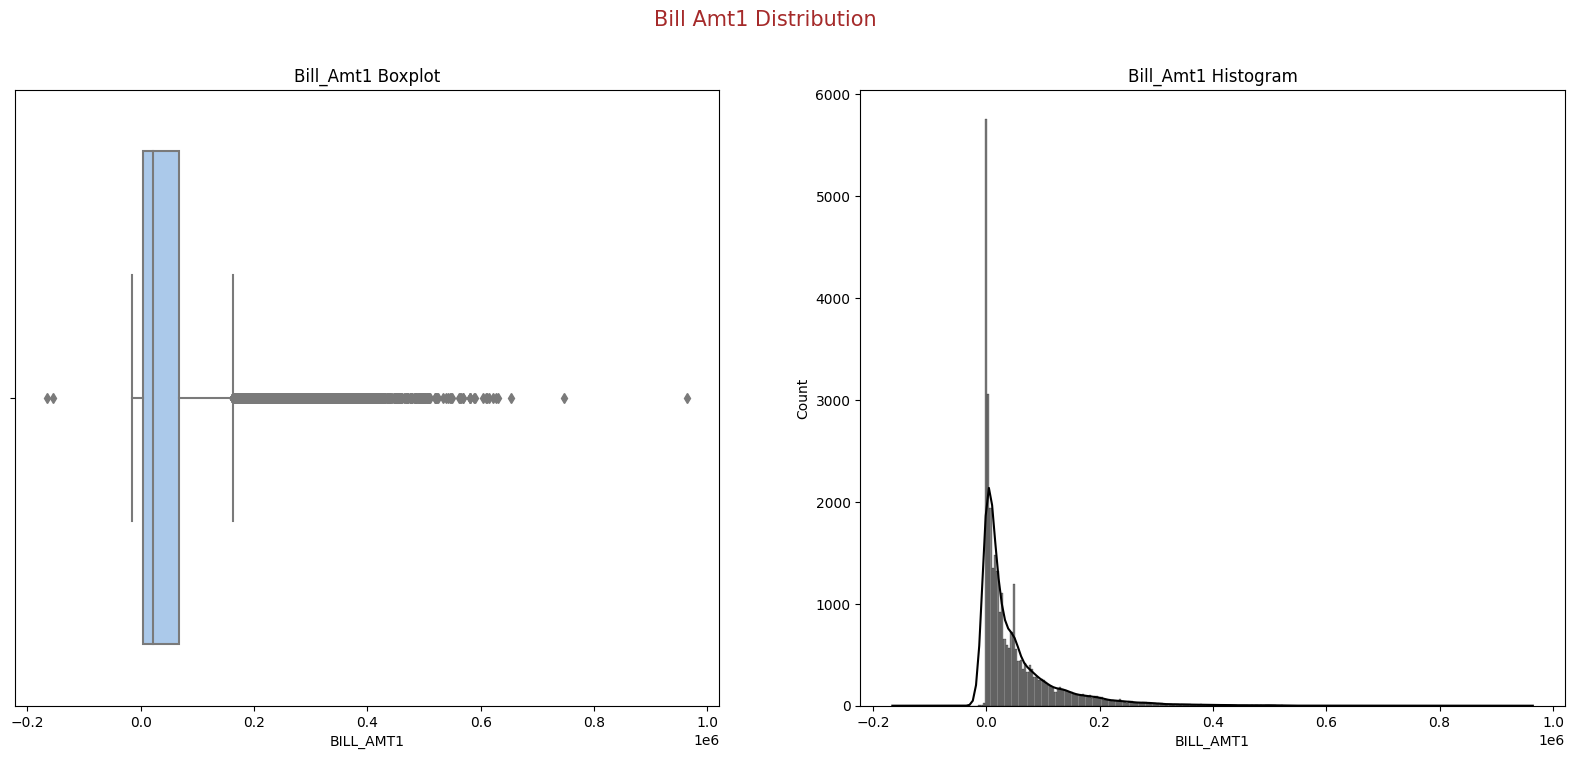

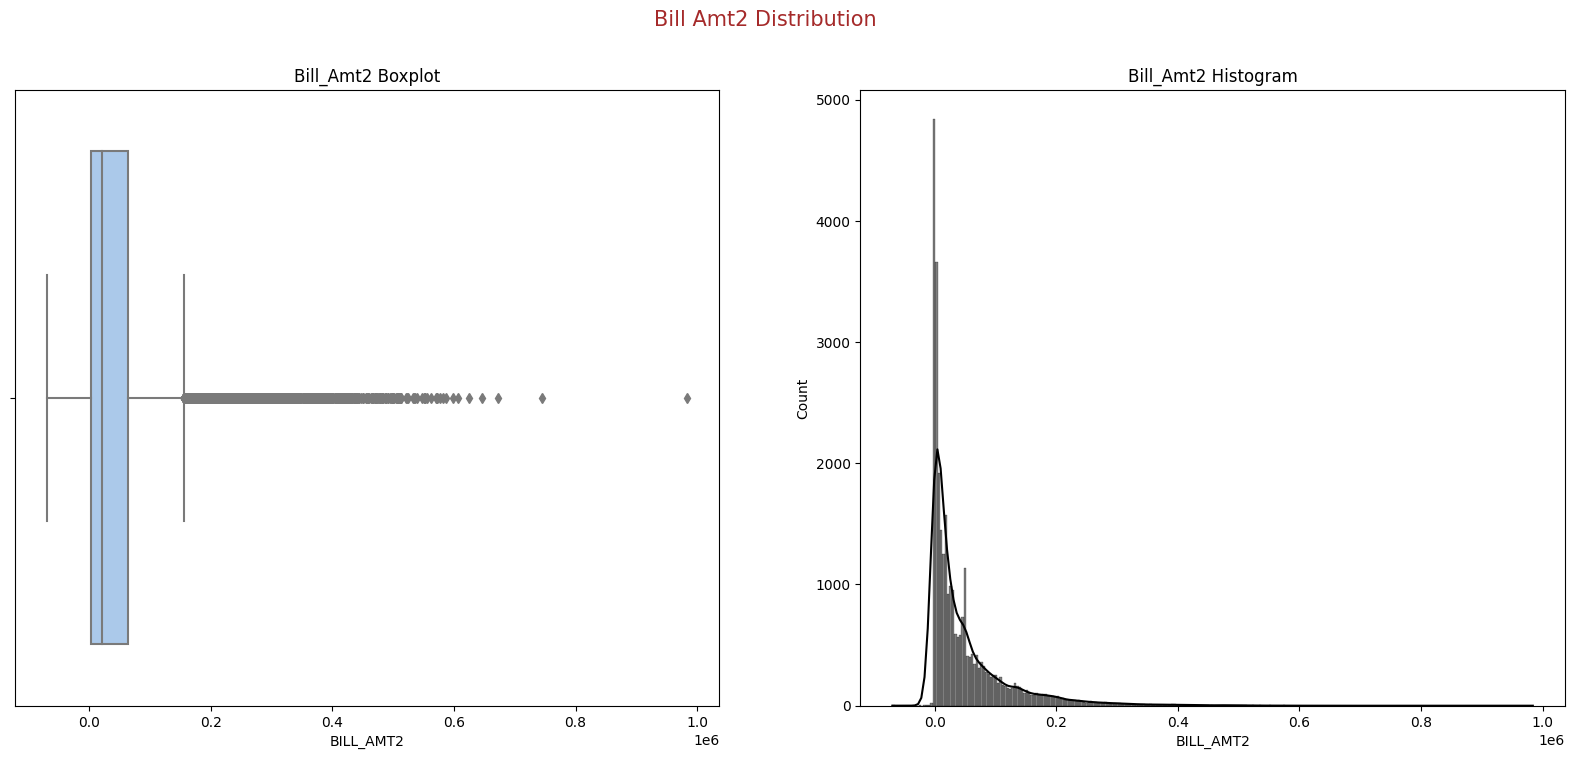

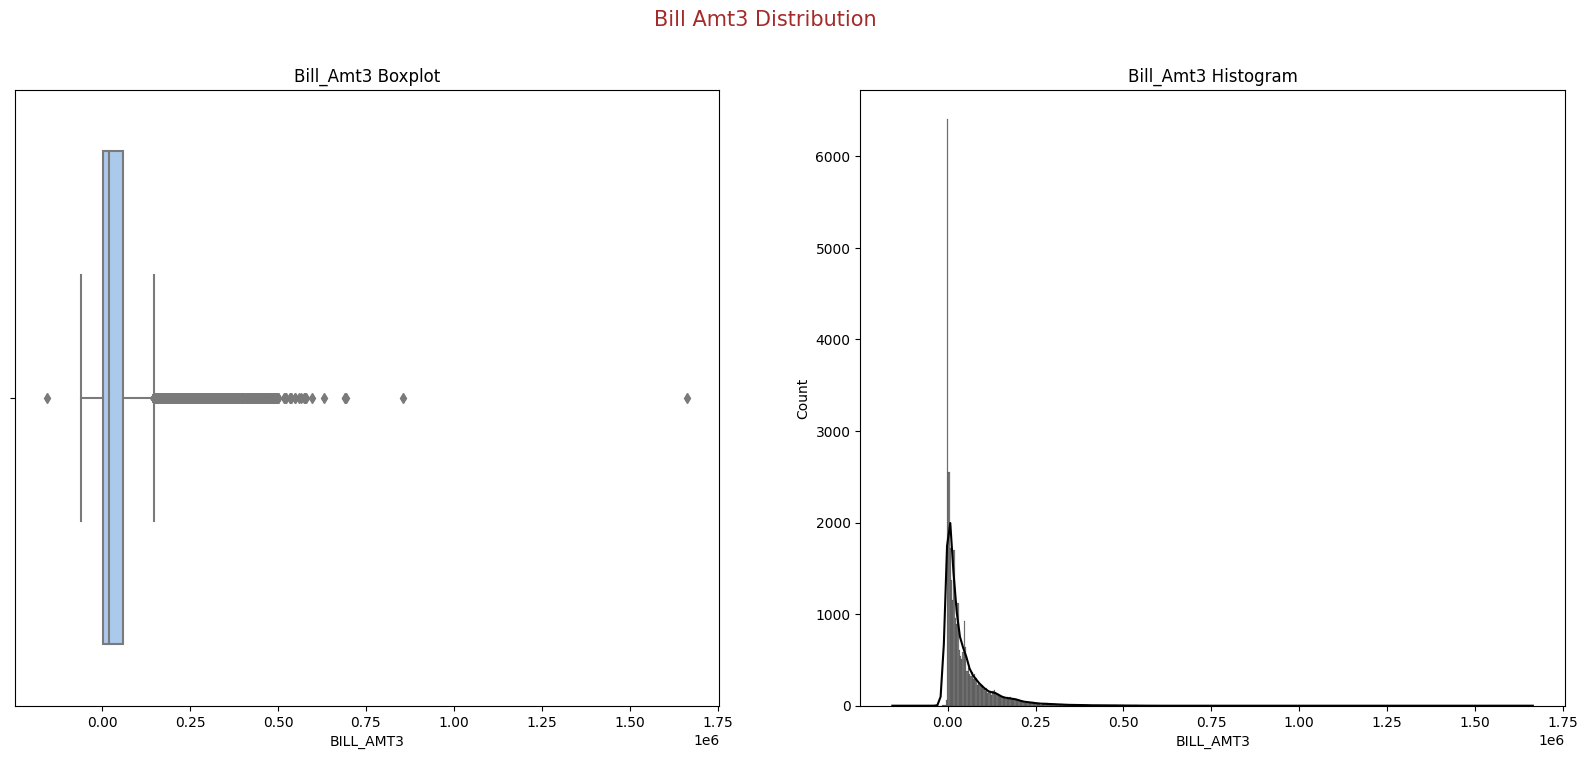

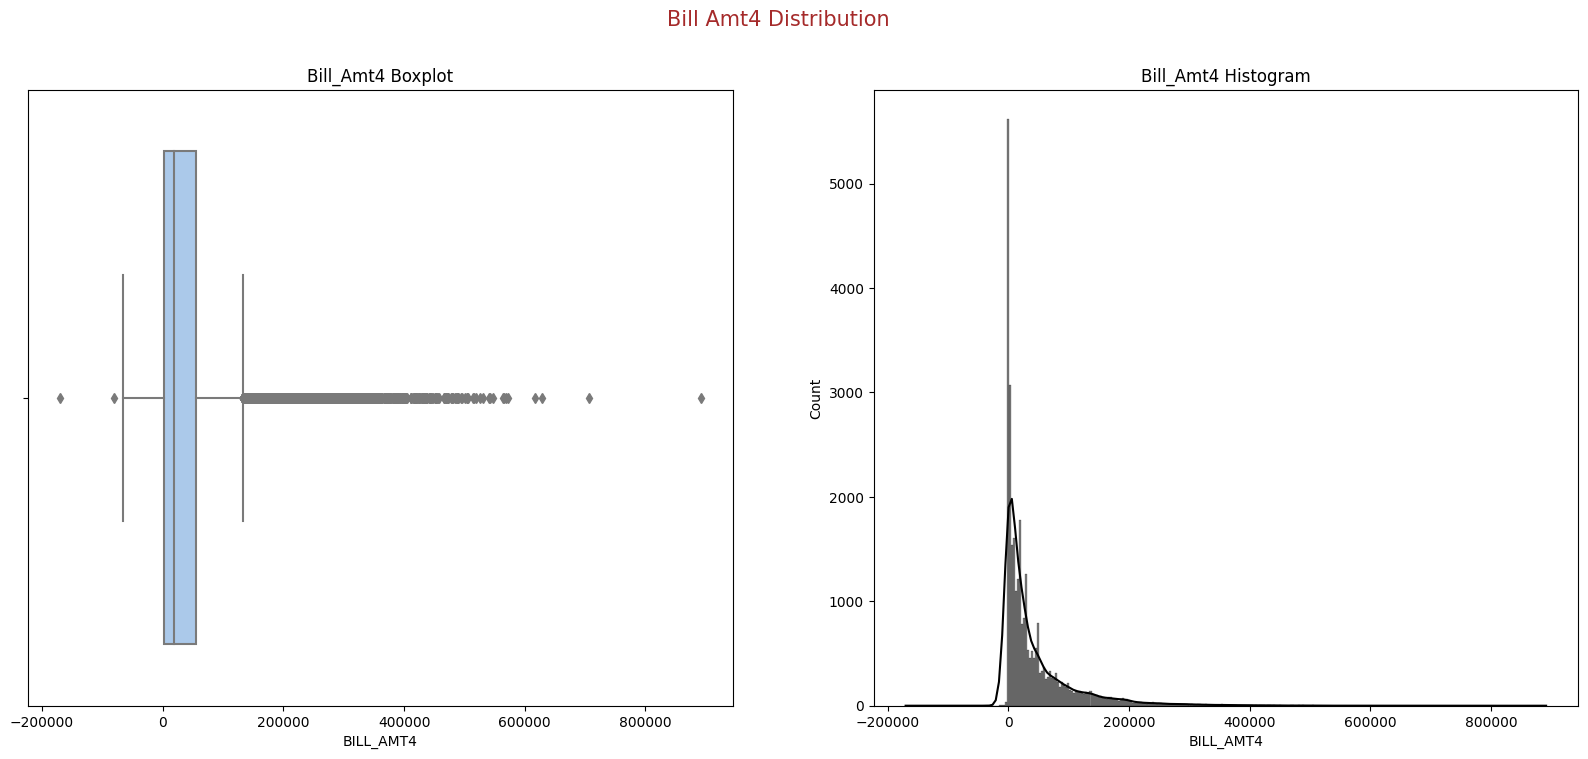

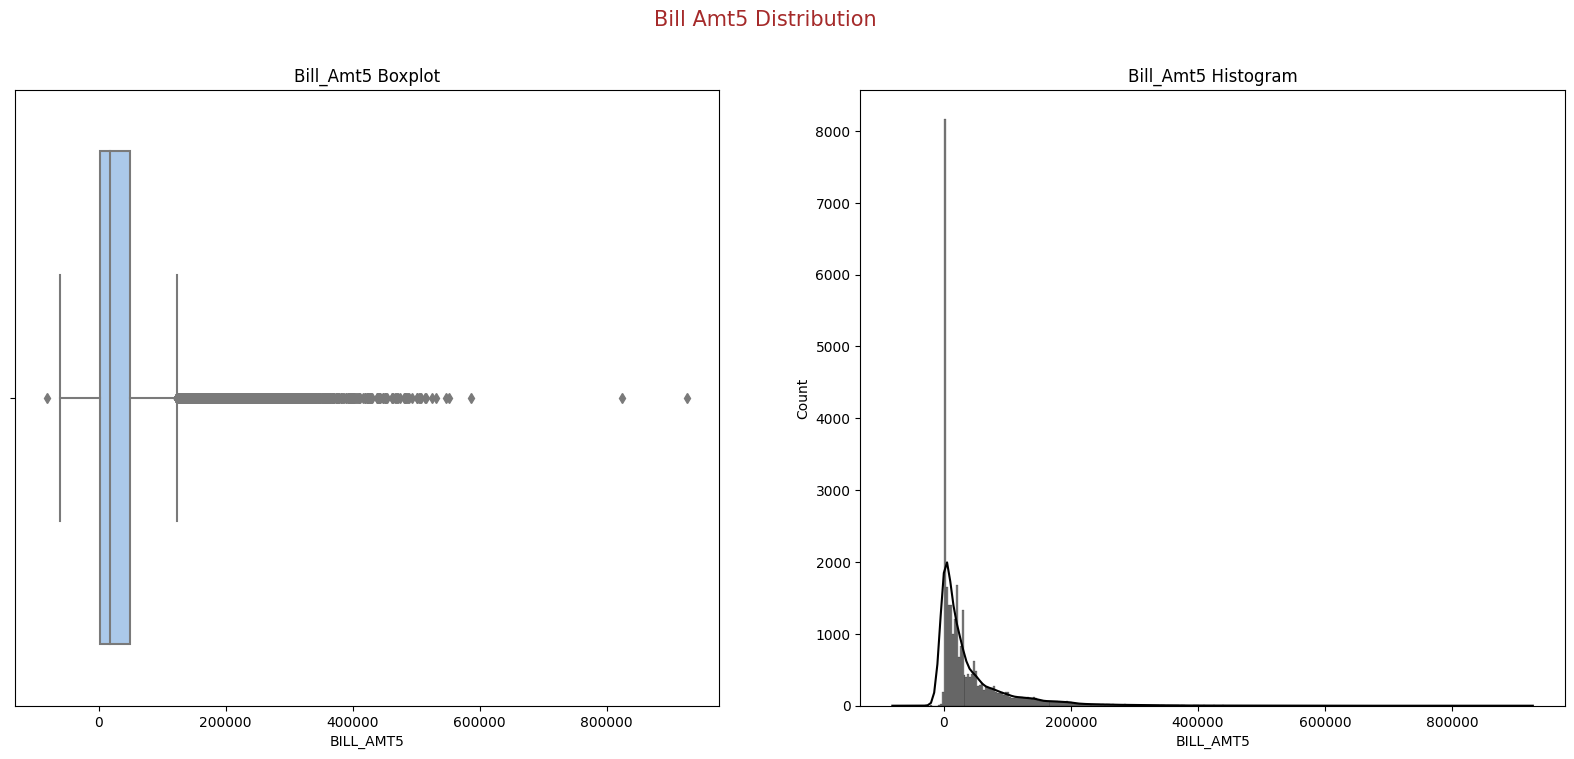

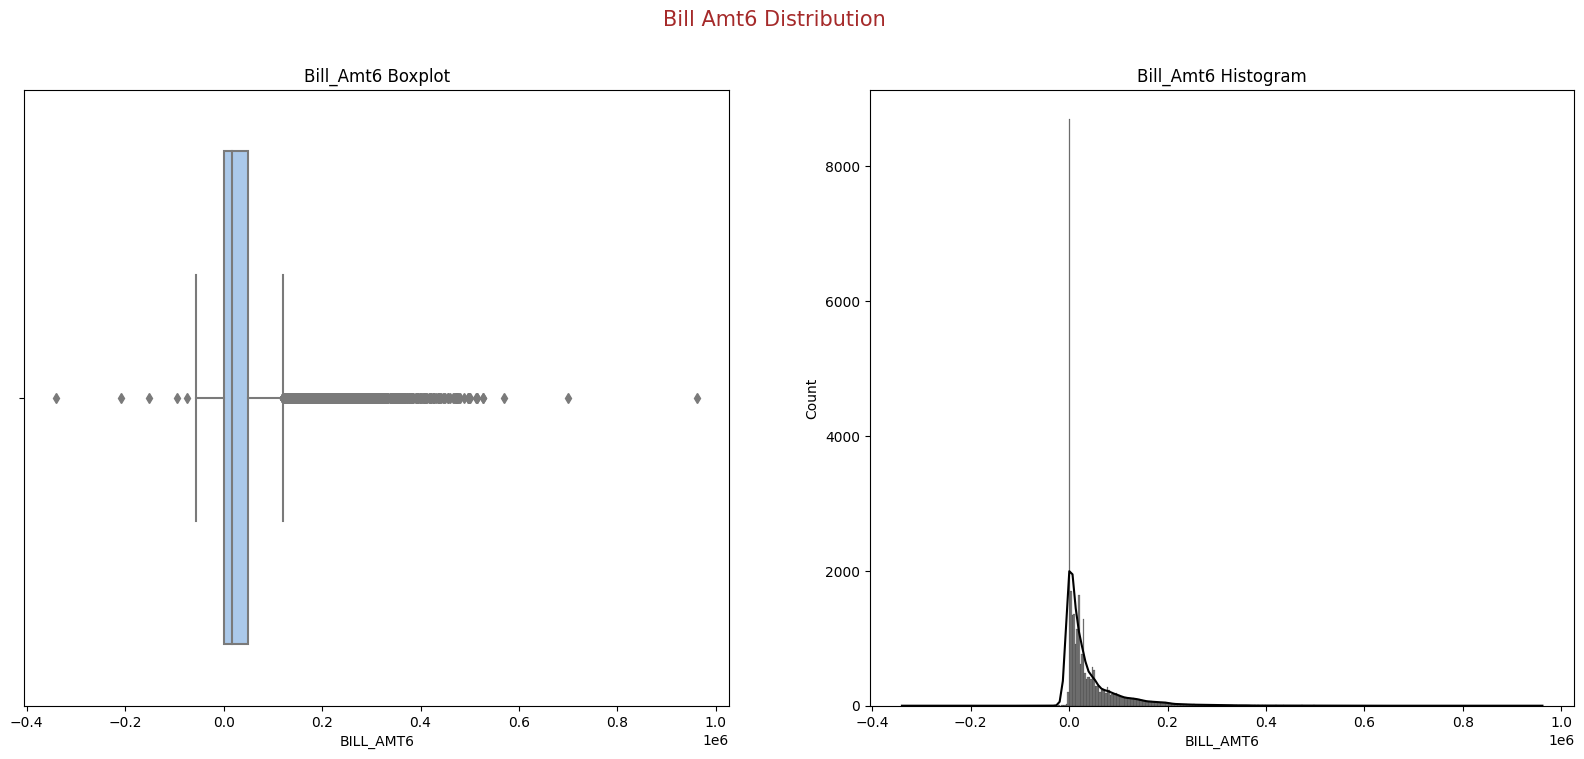

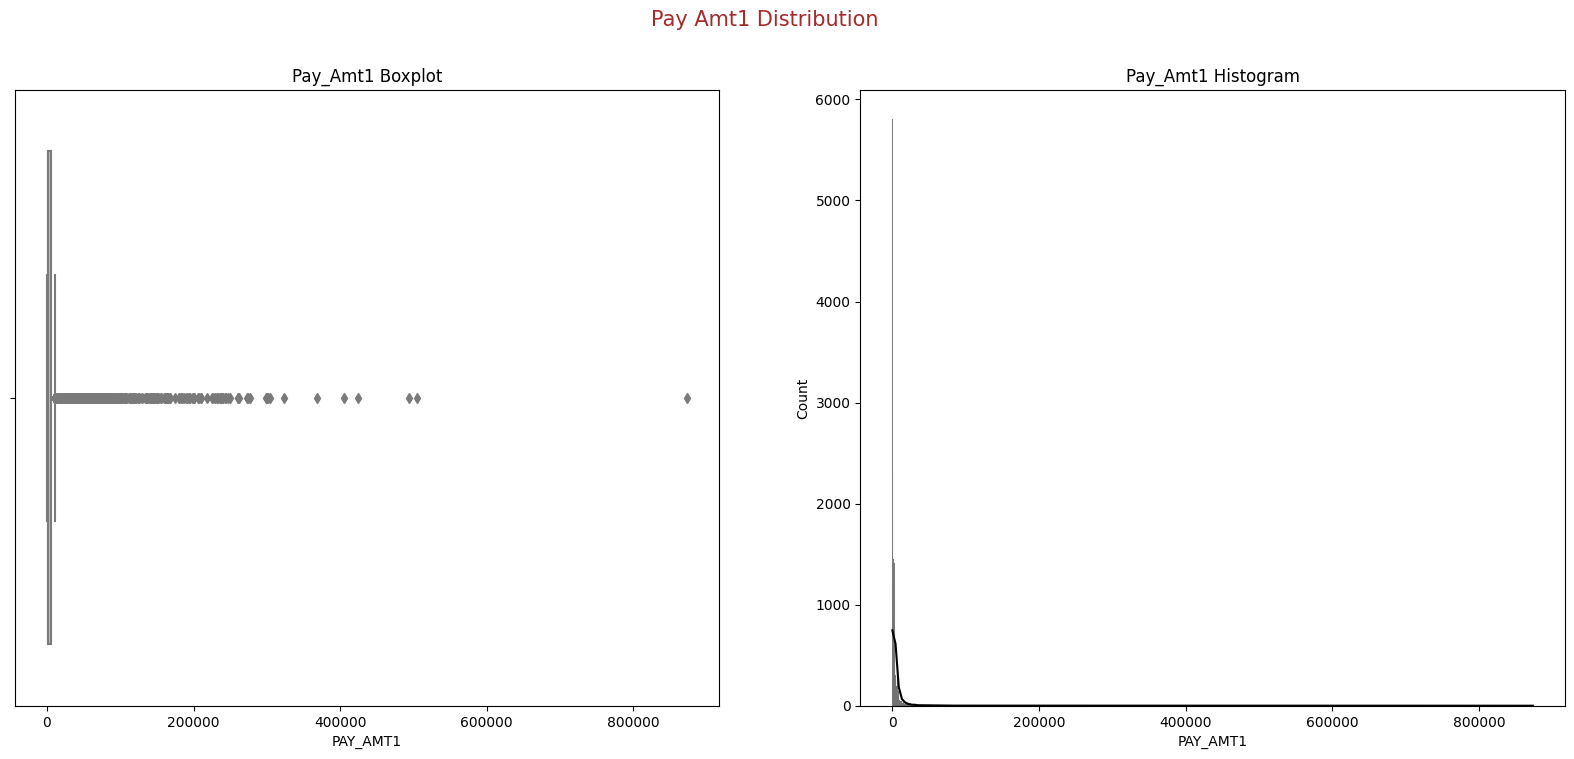

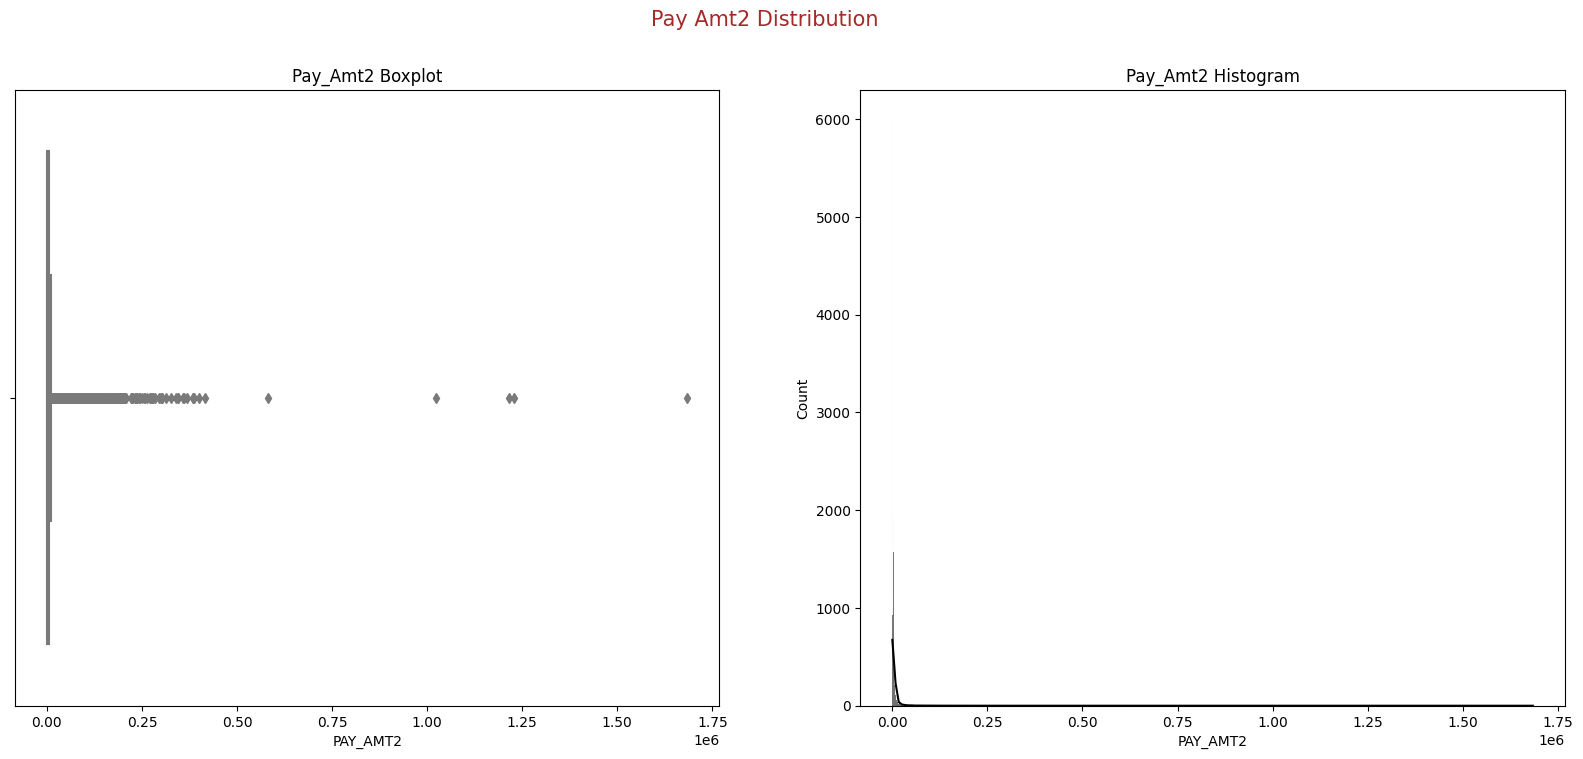

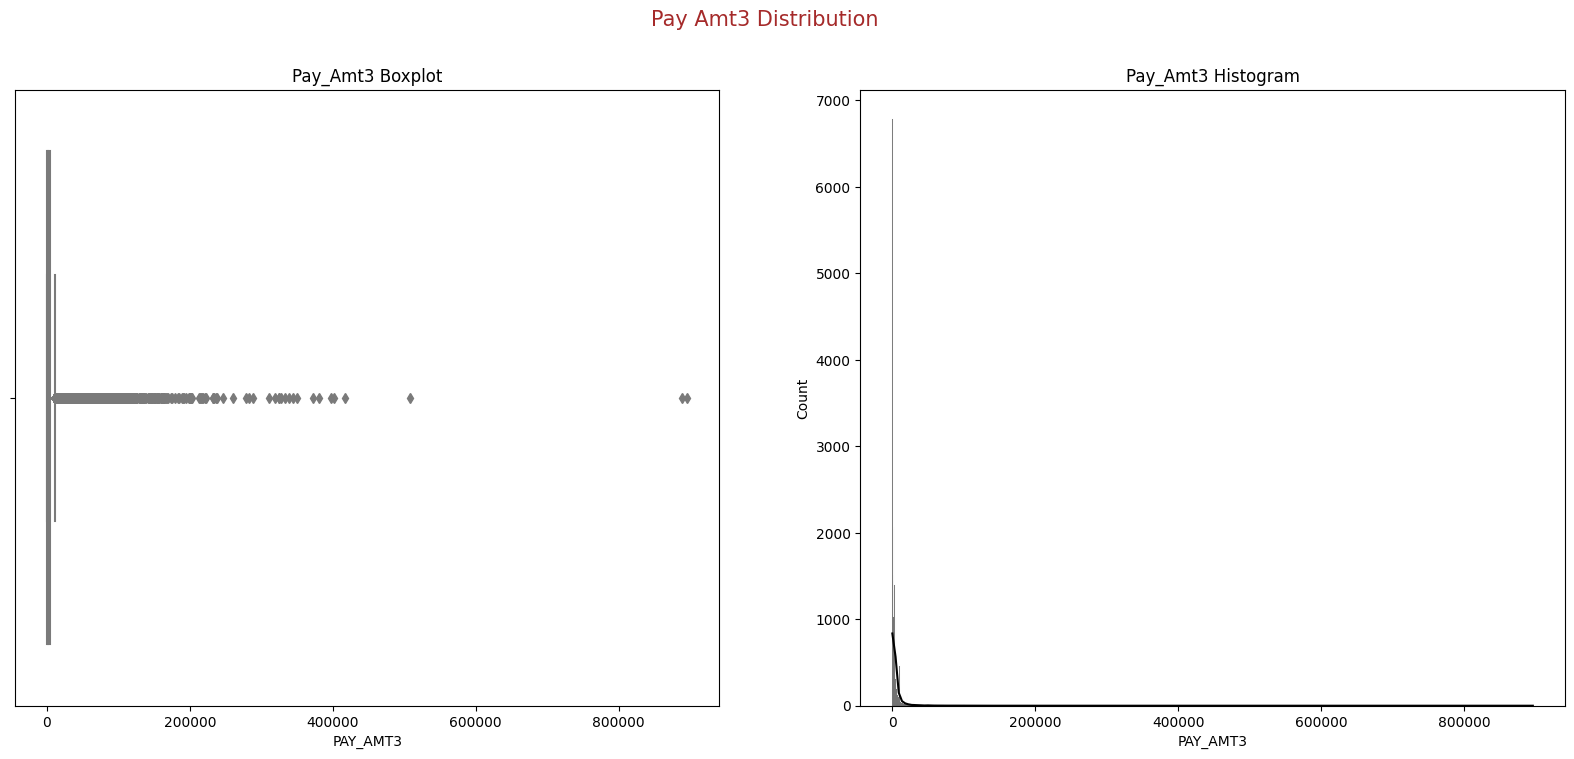

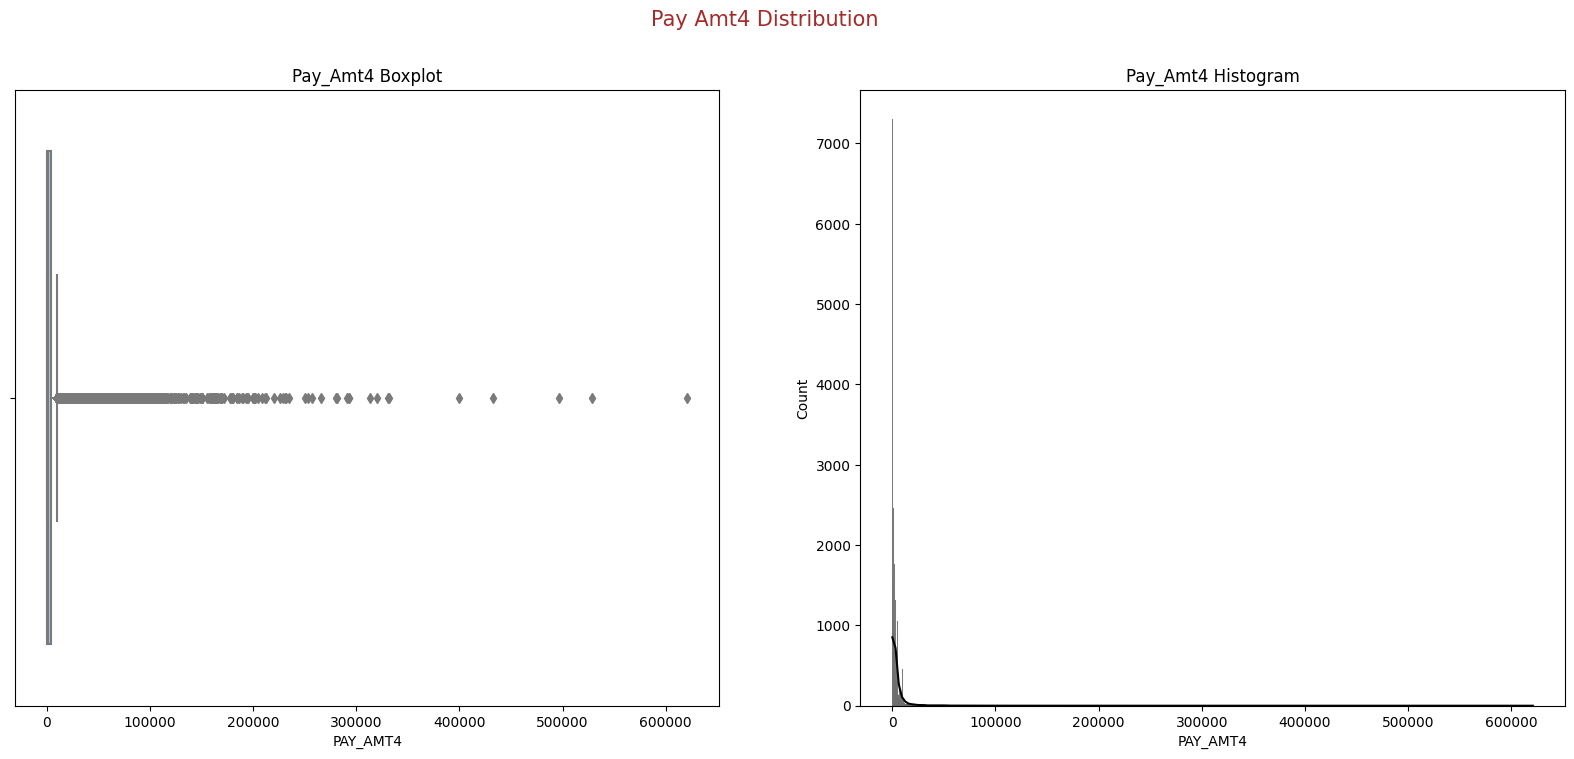

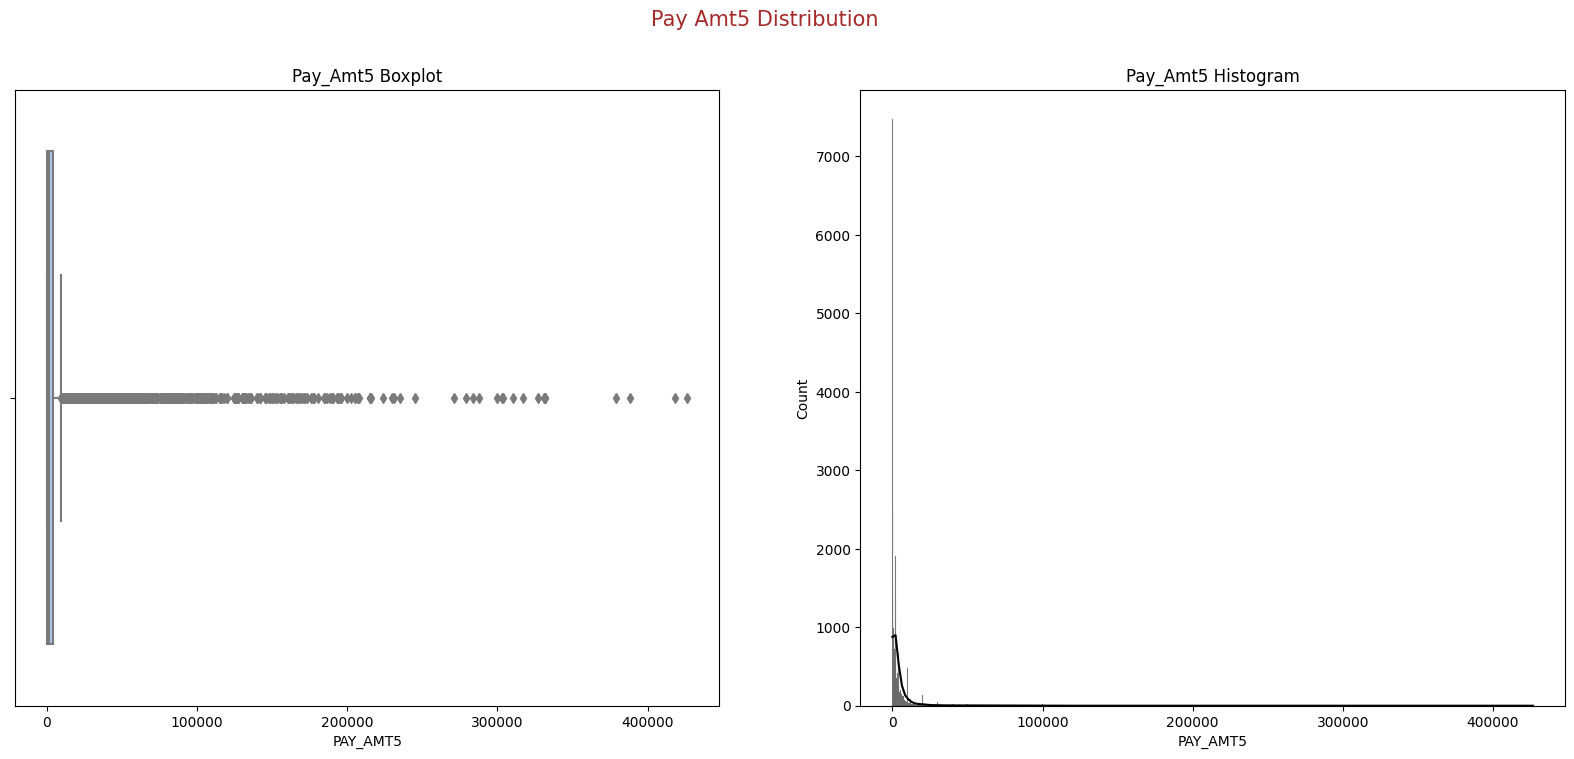

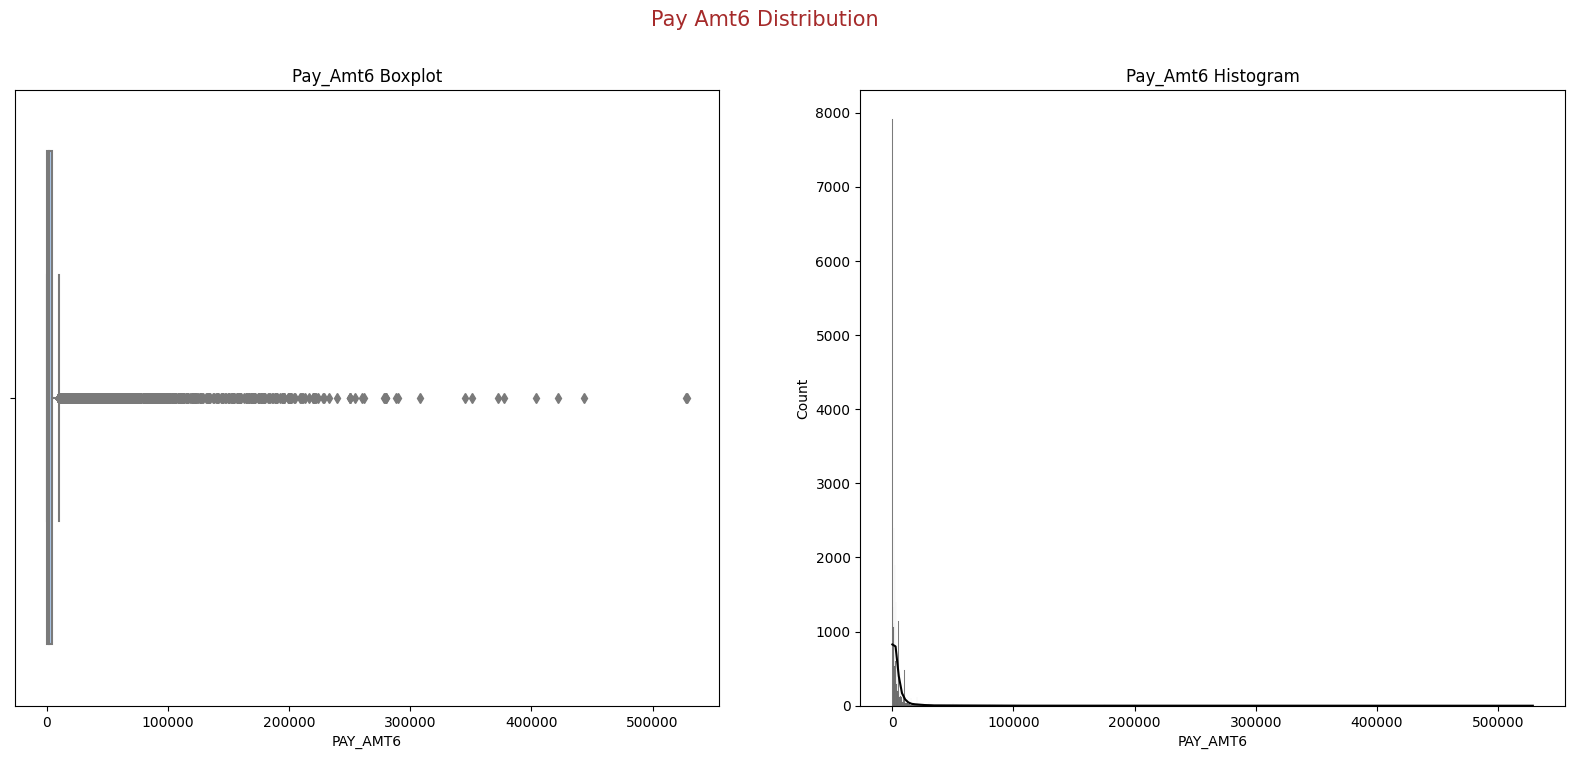

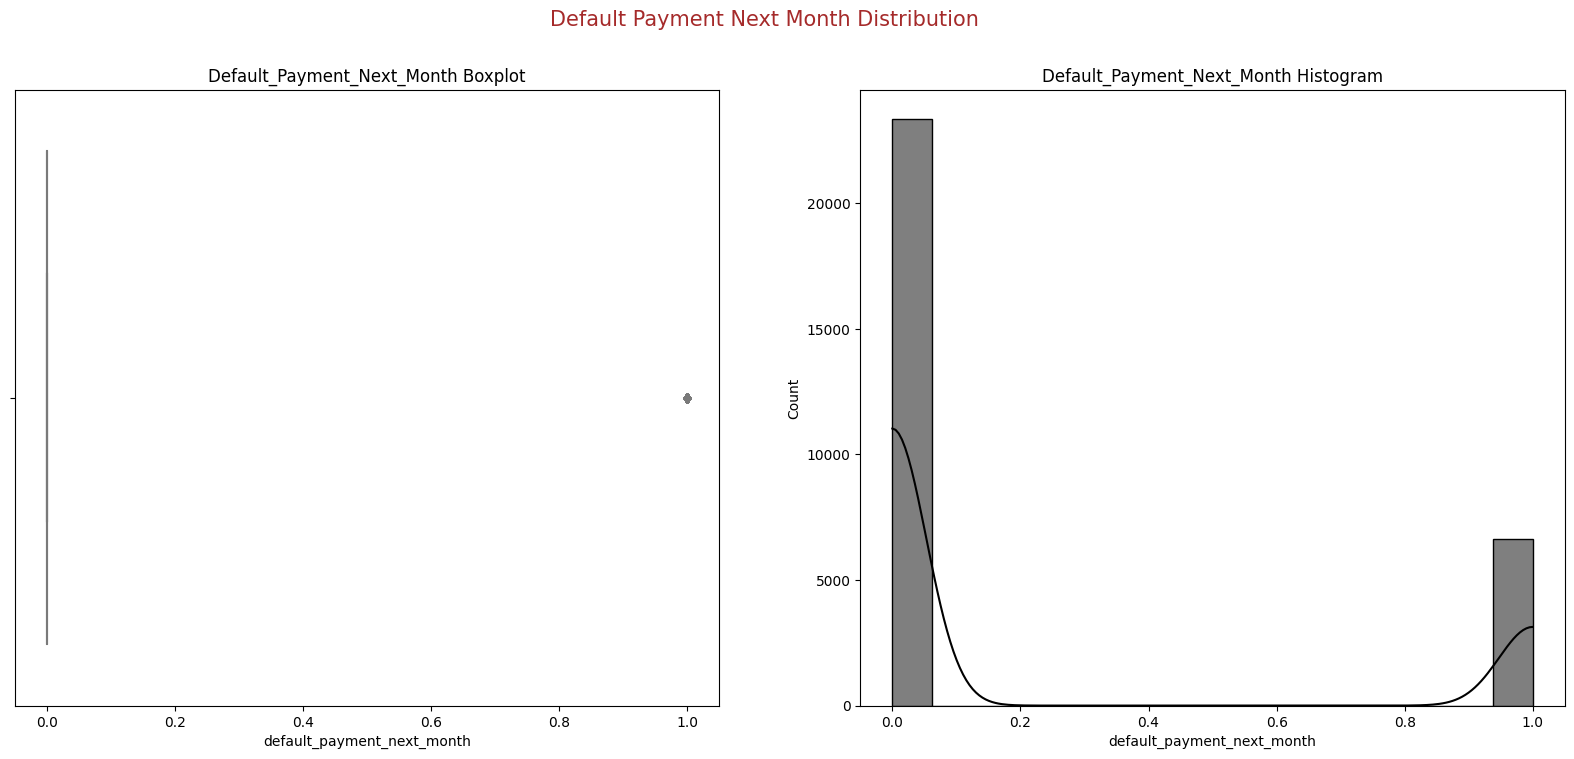

In [ ]:
for i in column_list:
  variable_distribution(df,i)


In [ ]:
#df.head()

In [ ]:
df2=df

In [ ]:
df2.to_csv('/content/drive/MyDrive/MSCI-623/final_data_default.csv')

In [ ]:
# function for outlier correction
def remove_outliers(df, column):
    # Calculate the IQR
    q1 = df[column].quantile(0.00)
    q3 = df[column].quantile(0.80)
    iqr = q3 - q1

    # Define the lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    # Filter out the outliers
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    # Plot the box plots
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].boxplot(df[column])
    axs[0].set_title('Original Data')
    axs[1].boxplot(filtered_df[column])
    axs[1].set_title('Data without Outliers')

    # Show the box plots
    plt.show()

    # Return the filtered DataFrame
    return filtered_df

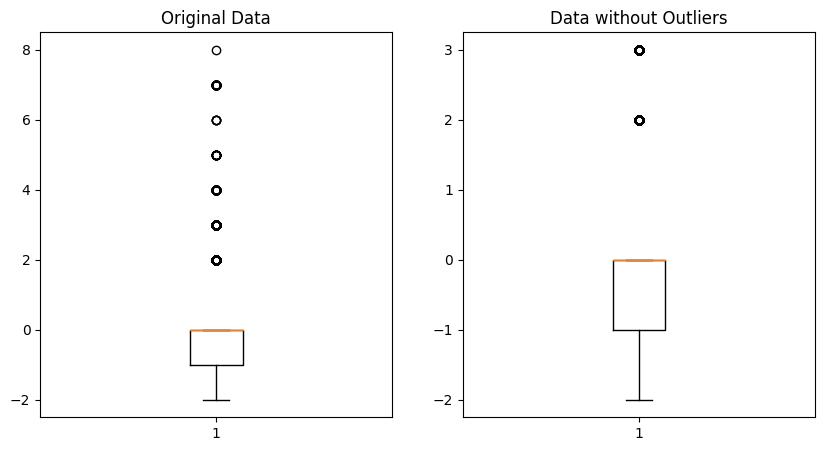

In [ ]:
filtered_df = remove_outliers(df, 'PAY_5')


In [ ]:
df.default_payment_next_month.value_counts()

0    23364
1     6636
Name: default_payment_next_month, dtype: int64

In [ ]:
filtered_df.default_payment_next_month.value_counts()

0    23313
1     6523
Name: default_payment_next_month, dtype: int64

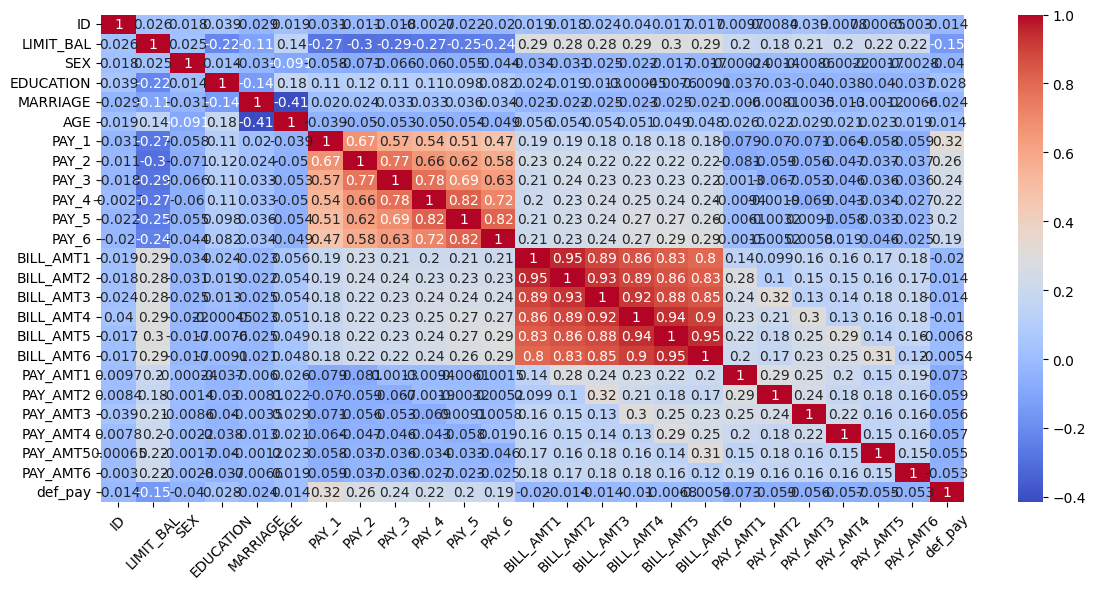

In [ ]:
#steps to check correlation on the regular data frame
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
#Model build Without over-sampling

In [ ]:
#Features
df.PAY_5.head()

0   -2
1    0
2    0
3    0
4    0
Name: PAY_5, dtype: int64

In [ ]:
#Target
Y=df['default_payment_next_month']
Y.head()

0    1
1    1
2    0
3    0
4    0
Name: default_payment_next_month, dtype: int64

In [ ]:
# Function to split the data into Train/Test and Validation. train=60%, test=20%, validation=20%.
# in the validation set we tune our model and in the test set we test our model predictions post training

def def_split_data_train_test_validate(df, test_size=0.2, val_size=0.2, random_state=42):
    #X=df.drop(['isFraud','amount'], axis=1) #TODO
    X=df.drop(['def_pay'], axis=1)
    y=df['def_pay']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size, random_state=random_state)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [ ]:
# Generic function for model validation
def Model_prefection(X_train, X_val, X_test, y_train, y_val, model_name):
    if model_name == 'DecisionTree':
        model = DecisionTreeClassifier()
    elif model_name == 'KNeighbors':
        model = KNeighborsClassifier() # TODO: add number of K
    elif model_name == 'RandomForest':
        model = RandomForestClassifier()
    elif model_name == 'LogisticRegression':
        model = LogisticRegression(max_iter=1000)

    else:
        raise ValueError("Invalid model name")

    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)
    return model, y_val_pred, y_test_pred

In [ ]:
#Function to print accuracy matrix

def print_accuracy(y_val, y_val_pred, y_test, y_test_pred):
    print("Validation Set Metrics:")
    print("Accuracy:", accuracy_score(y_val, y_val_pred))
    print("Precision:", precision_score(y_val, y_val_pred))
    print("Recall:", recall_score(y_val, y_val_pred))
    print("F1-score:", f1_score(y_val, y_val_pred))
    print("Kappa:", cohen_kappa_score(y_val, y_val_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_val_pred))
    print("\nTest Set Metrics:")
    print("Accuracy:", accuracy_score(y_test, y_test_pred))
    print("Precision:", precision_score(y_test, y_test_pred))
    print("Recall:", recall_score(y_test, y_test_pred))
    print("F1-score:", f1_score(y_test, y_test_pred))
    print("Kappa:", cohen_kappa_score(y_test, y_test_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_test_pred))

In [ ]:
def plot_roc_curve(y_test, y_test_pred, model_name):
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - ' + model_name)
    plt.legend(loc="lower right")
    plt.show()


In [ ]:
# Function to generate the classification report
def print_classification_report(y_test, y_test_pred, model_name):
    print("Classification Report for "+model_name+":")
    print(classification_report(y_test, y_test_pred))

In [ ]:
# Running the models

# Decision Tree
X_train, X_val, X_test, y_train, y_val, y_test = def_split_data_train_test_validate(df)


In [ ]:
model, y_val_pred, y_test_pred = Model_prefection(X_train, X_val, X_test, y_train, y_val, 'DecisionTree')


In [ ]:
print_accuracy(y_val, y_val_pred, y_test, y_test_pred)


Validation Set Metrics:
Accuracy: 0.7204166666666667
Precision: 0.38258575197889183
Recall: 0.4046511627906977
F1-score: 0.39330922242314653
Kappa: 0.21184869785453408
Confusion Matrix:
[[3023  702]
 [ 640  435]]

Test Set Metrics:
Accuracy: 0.7258333333333333
Precision: 0.37740029542097486
Recall: 0.38918507235338917
F1-score: 0.3832020997375328
Kappa: 0.20699935949330228
Confusion Matrix:
[[3844  843]
 [ 802  511]]


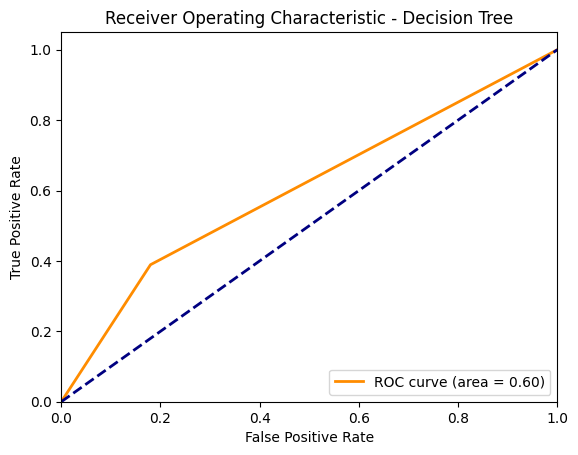

In [ ]:
plot_roc_curve(y_test, y_test_pred, 'Decision Tree')


In [ ]:
print_classification_report(y_test, y_test_pred, 'Decision Tree')

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      4687
           1       0.38      0.39      0.38      1313

    accuracy                           0.73      6000
   macro avg       0.60      0.60      0.60      6000
weighted avg       0.73      0.73      0.73      6000



In [ ]:
# KNeighbors
X_train, X_val, X_test, y_train, y_val, y_test = def_split_data_train_test_validate(df)
model, y_val_pred, y_test_pred = Model_prefection(X_train, X_val, X_test, y_train, y_val, 'KNeighbors')


In [ ]:
print_accuracy(y_val, y_val_pred, y_test, y_test_pred)


Validation Set Metrics:
Accuracy: 0.7504166666666666
Precision: 0.37773359840954274
Recall: 0.17674418604651163
F1-score: 0.2408111533586819
Kappa: 0.11436250086632427
Confusion Matrix:
[[3412  313]
 [ 885  190]]

Test Set Metrics:
Accuracy: 0.7515
Precision: 0.363914373088685
Recall: 0.18126428027418126
F1-score: 0.24199288256227758
Kappa: 0.11290447331752307
Confusion Matrix:
[[4271  416]
 [1075  238]]


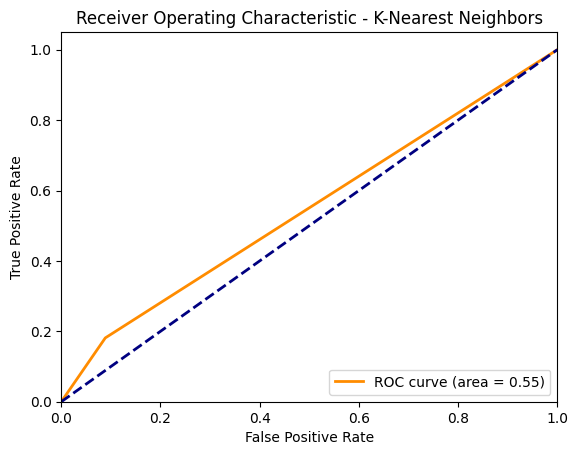

In [ ]:
plot_roc_curve(y_test, y_test_pred, 'K-Nearest Neighbors')


In [ ]:
print_classification_report(y_test, y_test_pred, 'K-Nearest Neighbors')

Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      4687
           1       0.36      0.18      0.24      1313

    accuracy                           0.75      6000
   macro avg       0.58      0.55      0.55      6000
weighted avg       0.70      0.75      0.72      6000



In [ ]:
# Random Forest
X_train, X_val, X_test, y_train, y_val, y_test = def_split_data_train_test_validate(df)
model, y_val_pred, y_test_pred = Model_prefection(X_train, X_val, X_test, y_train, y_val, 'RandomForest')


In [ ]:
print_accuracy(y_val, y_val_pred, y_test, y_test_pred)


Validation Set Metrics:
Accuracy: 0.8114583333333333
Precision: 0.6523297491039427
Recall: 0.3386046511627907
F1-score: 0.44580526638089407
Kappa: 0.345655022820733
Confusion Matrix:
[[3531  194]
 [ 711  364]]

Test Set Metrics:
Accuracy: 0.8171666666666667
Precision: 0.652112676056338
Recall: 0.3526275704493526
F1-score: 0.45773603559070686
Kappa: 0.359325023312315
Confusion Matrix:
[[4440  247]
 [ 850  463]]


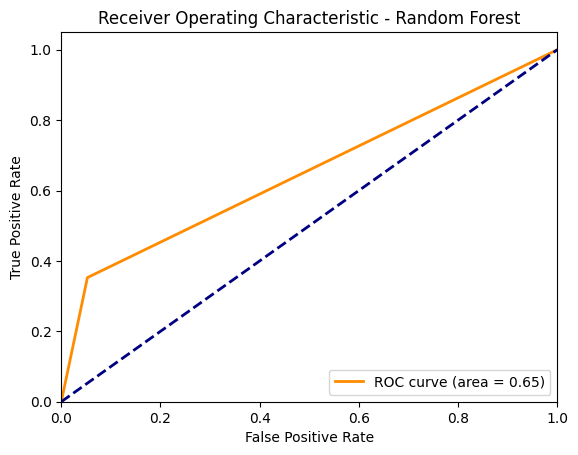

In [ ]:
plot_roc_curve(y_test, y_test_pred, 'Random Forest')


In [ ]:
print_classification_report(y_test, y_test_pred, 'Random Forest')

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.65      0.35      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.67      6000
weighted avg       0.80      0.82      0.80      6000



In [ ]:
# Logistic Regression
X_train, X_val, X_test, y_train, y_val, y_test = def_split_data_train_test_validate(df)
model, y_val_pred, y_test_pred = Model_prefection(X_train, X_val, X_test, y_train, y_val, 'LogisticRegression')

In [ ]:
print_accuracy(y_val, y_val_pred, y_test, y_test_pred)

Validation Set Metrics:
Accuracy: 0.7760416666666666
Precision: 0.0
Recall: 0.0
F1-score: 0.0
Kappa: 0.0
Confusion Matrix:
[[3725    0]
 [1075    0]]

Test Set Metrics:
Accuracy: 0.7811666666666667
Precision: 0.0
Recall: 0.0
F1-score: 0.0
Kappa: 0.0
Confusion Matrix:
[[4687    0]
 [1313    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


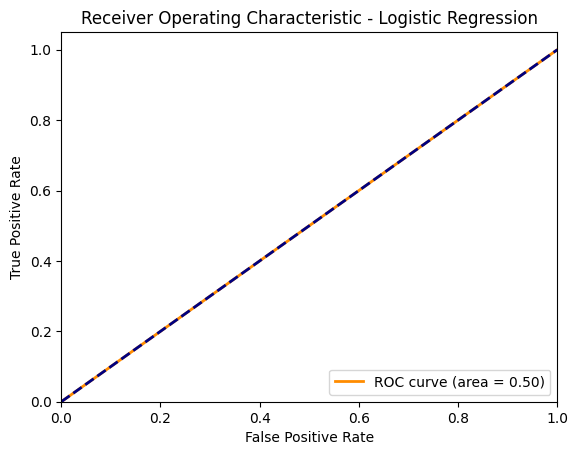

In [ ]:
plot_roc_curve(y_test, y_test_pred, 'Logistic Regression')

In [ ]:
print_classification_report(y_test, y_test_pred, 'Logistic Regression')

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4687
           1       0.00      0.00      0.00      1313

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.69      6000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
